## Data Collection

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#!pip install tensorflow_datasets

import tensorflow_datasets as tfds

radon, info = tfds.load('radon', with_info=True, split='train')

df = tfds.as_dataframe(radon, info)

df.rename(columns=lambda x: x.replace('features/',""), inplace=True)

for col, dtype in df.dtypes.items():
    if dtype == np.object:  # Only process byte object columns.
        df[col] = df[col].apply(lambda x: x.decode("utf-8"))

In [10]:
pd.set_option("display.max_columns", None)
df.head()

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,1.6,2.49759,292.219543,N,3,ALLEN,0,1,1681,41.091000,-85.067001,12.7,2,3,2,11489,2230,IN,IN,18,11689,2235,2,1,92,,46835,0
1,0.5,2.66527,364.958313,N,25,YAVAPAI,0,1,1457,34.599998,-112.554001,0.0,2,5,2,22688,833,AZ,AZ,4,22888,1010,2,1,56,,86325,0
2,3.0,2.43343,626.564575,Y,17,MIDDLESEX,0,0,4224,42.485001,-71.391998,9.7,6,1,2,32288,1000,MA,MA,25,32488,1000,1,1,23,,1778,0
3,0.6,2.43343,570.611755,N,17,MIDDLESEX,0,1,4094,42.485001,-71.391998,27.6,6,3,3,32488,700,MA,MA,25,32688,1200,1,1,62,,1432,0
4,1.2,2.10811,426.798859,Y,95,JACKSON,0,0,6849,39.007999,-94.347000,23.5,1,3,4,32288,605,MO,MO,29,32488,610,2,1,91,,64134,0


## Data Exploration

### Check datatype

In [4]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  12573 non-null  float32
 1   Uppm      12573 non-null  float32
 2   adjwt     12573 non-null  float32
 3   basement  12573 non-null  object 
 4   cntyfips  12573 non-null  int32  
 5   county    12573 non-null  object 
 6   dupflag   12573 non-null  int32  
 7   floor     12573 non-null  int32  
 8   idnum     12573 non-null  int32  
 9   lat       12573 non-null  float32
 10  lon       12573 non-null  float32
 11  pcterr    12573 non-null  float32
 12  region    12573 non-null  int32  
 13  rep       12573 non-null  int32  
 14  room      12573 non-null  int32  
 15  startdt   12573 non-null  int32  
 16  starttm   12573 non-null  int32  
 17  state     12573 non-null  object 
 18  state2    12573 non-null  object 
 19  stfips    12573 non-null  int32  
 20  st

### Check NA

In [4]:
df.isna().sum().sort_values()

activity    0
windoor     0
wave        0
typebldg    0
stratum     0
stoptm      0
stopdt      0
stfips      0
state2      0
state       0
starttm     0
startdt     0
room        0
rep         0
region      0
pcterr      0
lon         0
lat         0
idnum       0
floor       0
dupflag     0
county      0
cntyfips    0
basement    0
adjwt       0
Uppm        0
zip         0
zipflag     0
dtype: int64

### Check Flag columns

In [14]:
print(df.groupby(['dupflag','zipflag'])['idnum'].count().sort_values(ascending=False))
print(df.loc[df['dupflag']==2,['activity','idnum','county','state2','startdt','zip']])
print(df.loc[df['dupflag']==2,['activity','idnum','county','state2','startdt','zip']].duplicated())
print(df.loc[df['zipflag']==1,['activity','idnum','county','state2','startdt','zip']])
print(df.loc[df['zipflag']==1,['activity','idnum','county','state2','startdt','zip']].duplicated())

dupflag  zipflag
0        0          12118
1        0            395
2        0             49
0        1             10
1        1              1
Name: idnum, dtype: int64
         activity  idnum                county state2  startdt    zip
67      26.600000   5207  CLAY                     MN   122187  56549
232     23.799999   5532  MARSHALL                 MN    12688  56710
342      0.300000   6030  BARRY                    MO    32688  65708
525     25.400000   5557  MCLEOD                   MN    11788  55350
690      2.100000   5722  SCOTT                    MN    31388  55372
1315   198.899994   4730  PLYMOUTH                 MA    40488   2360
1344     4.000000   3015  SCOTT                    IN    31189  47170
1749    32.599998   5327  FREEBORN                 MN   121487  56026
1835     4.100000   9452  WILLIAMS                 ND    22988  58843
2229     1.400000    645  MARICOPA                 AZ    32188  85236
2383     5.600000   2839  NOBLE                    IN   1

In [15]:
df.drop(['dupflag','zipflag'], axis=1, inplace=True)

### Check duplicated columns of State

In [16]:
print(pd.crosstab(index=df['state2'],columns=df['state']))
print(pd.crosstab(index=df['state2'],columns=df['stfips']))
df.drop(['state','stfips'], axis=1, inplace=True)

state     AZ    IN    MA   MN    MO    ND    PA   R5
state2                                              
AZ      1507     0     0    0     0     0     0    0
IN         0  1914     0    0     0     0     0    0
MA         0     0  1659    0     0     0     0    0
MI         0     0     0    0     0     0     0  198
MN         0     0     0  919     0     0     0  263
MO         0     0     0    0  1859     0     0    0
ND         0     0     0    0     0  1596     0    0
PA         0     0     0    0     0     0  2389    0
WI         0     0     0    0     0     0     0  269
stfips    4     18    25   26    27    29    38    42   55
state2                                                    
AZ      1507     0     0    0     0     0     0     0    0
IN         0  1914     0    0     0     0     0     0    0
MA         0     0  1659    0     0     0     0     0    0
MI         0     0     0  198     0     0     0     0    0
MN         0     0     0    0  1182     0     0     0    0
MO  

### Check duplicated columns of County

In [17]:
print(df.groupby('county')['cntyfips'].nunique().sort_values(ascending=False).head())
print(df.loc[df['county']=='WISCONSIN WINNEBAGO ',['activity','county','cntyfips','state2','zip']])

county
                        12
WISCONSIN WINNEBAGO      6
FRANKLIN                 4
SAULT ST. MARIE          4
WASHINGTON               4
Name: cntyfips, dtype: int64
       activity                county  cntyfips state2    zip
174         1.9  WISCONSIN WINNEBAGO         81     WI  54660
267         0.3  WISCONSIN WINNEBAGO        141     WI  54489
486         0.6  WISCONSIN WINNEBAGO        141     WI  54494
3336        0.6  WISCONSIN WINNEBAGO         81     WI  54660
5104        1.3  WISCONSIN WINNEBAGO         53     WI  54615
5448        1.9  WISCONSIN WINNEBAGO         53     WI  54615
5485        9.4  WISCONSIN WINNEBAGO        115     WI  54499
5542        1.0  WISCONSIN WINNEBAGO         53     WI  54615
5631        0.8  WISCONSIN WINNEBAGO        141     WI  54494
5685        0.5  WISCONSIN WINNEBAGO         35     WI  54741
6068        0.3  WISCONSIN WINNEBAGO         81     WI  54660
7538        1.2  WISCONSIN WINNEBAGO         53     WI  54615
7956        2.3  WISCON

In [18]:
df['area'] = df['county'] + df['state2']

In [19]:
df.drop(['county','cntyfips','state2','zip'], axis=1, inplace=True)

In [21]:
# remove lat lon and use area instead
df.drop(['lat','lon'], axis=1, inplace=True)

### Check non-informative columns

In [23]:
print(df.groupby('windoor')['idnum'].count().sort_values(ascending=False))
df.drop('windoor', axis=1, inplace=True)

windoor
     12573
Name: idnum, dtype: int64


In [24]:
print(df['idnum'].value_counts().sort_values(ascending=False))
df.drop('idnum', axis=1, inplace=True)

1681     1
4398     1
10519    1
4224     1
4094     1
        ..
11040    1
3625     1
10815    1
11358    1
5074     1
Name: idnum, Length: 12573, dtype: int64


In [28]:
print(df['rep'].value_counts().sort_values(ascending=False))
df.drop('rep', axis=1, inplace=True)

 5    2392
 4    2376
 2    2374
 3    2360
 1    2341
-1     730
Name: rep, dtype: int64


In [29]:
print(df['stratum'].value_counts().sort_values(ascending=False))
df.drop('stratum', axis=1, inplace=True)

2     3508
1     3182
3     2454
4     2062
5      762
12      82
25      76
15      63
22      56
7       56
20      45
23      36
18      25
9       25
27      20
8       19
6       17
16      14
13      11
26      11
11      10
28       8
21       6
29       6
10       5
14       5
24       4
17       4
19       1
Name: stratum, dtype: int64


### Clean Basement column

In [32]:
list_ = []
for i in df['basement'].values:
    if i == 'Y':
        list_.append(i)
    elif i == 'N':
        list_.append(i)
    else:
        list_.append('Unknown')

df['basement'] = list_
df['basement'].value_counts()

Y          8469
N          3354
Unknown     750
Name: basement, dtype: int64

### Datetime treatment

In [34]:
dt_columns = ['startdt','starttm','stopdt','stoptm']

for i in dt_columns:
    df[i] = df[i].astype(str)

for col in dt_columns:
    list_ = []
    for i in df[col].values:
        if len(i) == 5:
            list_.append('0' + i)
        elif len(i) == 3:
            list_.append('0' + i)
        elif len(i) == 2:
            list_.append('00' + i)
        elif len(i) == 1:
            list_.append('000' + i)
        else: list_.append(i)
    df[col] = list_

In [35]:
df['start'] = df['startdt'] + df['starttm']
df['stop'] = df['stopdt'] + df['stoptm']
df['start'] = pd.to_datetime(df['start'], format = '%m%d%y%H%M')
df['stop'] = pd.to_datetime(df['stop'], format = '%m%d%y%H%M')

In [151]:
df[['start','stop']].agg(['min','max'])

,start,stop
min,1987-11-17 15:55:00,1987-11-19 16:15:00
max,1989-04-11 20:45:00,1999-01-01 00:00:00


Calculate duration and month

In [36]:
import datetime
df['days'] = abs(df['stop'] - df['start']).dt.days
df['month'] = df['start'].dt.strftime('%m/%Y')

In [37]:
df.drop(['startdt','starttm','stopdt','stoptm','start','stop'], axis=1, inplace=True)

### Convert to categorical columns

In [38]:
df.to_csv('data.csv', index=False)

In [85]:
df = pd.read_csv('data.csv')

In [86]:
df.head()

,activity,Uppm,adjwt,basement,floor,pcterr,region,room,typebldg,wave,area,days,month
0,1.6,2.49759,292.21954,N,1,12.7,2,2,1,92,ALLEN IN,2,01/1989
1,0.5,2.66527,364.95830,N,1,0.0,2,2,1,56,YAVAPAI AZ,2,02/1988
2,3.0,2.43343,626.56460,Y,0,9.7,6,2,1,23,MIDDLESEX MA,2,03/1988
3,0.6,2.43343,570.61176,N,1,27.6,6,3,1,62,MIDDLESEX MA,2,03/1988
4,1.2,2.10811,426.79886,Y,0,23.5,1,4,1,91,JACKSON MO,2,03/1988


In [87]:
cat_columns = ['basement','month','typebldg','area','region']

for i in cat_columns:
    df[i] = df[i].astype('category')

In [ ]:
# final decision to drop 2 more additional columns 
df.drop(['days','month','area'], axis=1, inplace=True)

### Check distribution of activity

mean    4.460781
std     9.239972
Name: activity, dtype: float64

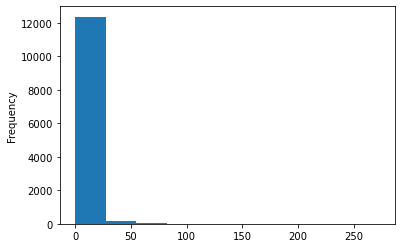

In [9]:
df['activity'].plot(kind='hist')
df['activity'].agg(['mean','std'])

## Data Preparation

### Get Dummies

In [88]:
model_df = pd.get_dummies(df, dtype=int)
pd.set_option("display.max_columns", None)
model_df.head()

,activity,Uppm,adjwt,floor,pcterr,room,wave,basement_N,basement_Unknown,basement_Y,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,typebldg_0,typebldg_1,typebldg_2,typebldg_3,typebldg_5
0,1.6,2.49759,292.21954,1,12.7,2,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.5,2.66527,364.95830,1,0.0,2,56,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.0,2.43343,626.56460,0,9.7,2,23,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.6,2.43343,570.61176,1,27.6,3,62,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1.2,2.10811,426.79886,0,23.5,4,91,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Normalization

In [90]:
num_columns = ['Uppm','adjwt','floor','pcterr','room','wave']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in num_columns:
    model_df[col] = scaler.fit_transform(model_df[col].values.reshape(-1, 1))

In [91]:
model_df.head()

,activity,Uppm,adjwt,floor,pcterr,room,wave,basement_N,basement_Unknown,basement_Y,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,typebldg_0,typebldg_1,typebldg_2,typebldg_3,typebldg_5
0,1.6,0.719290,-0.583569,0.345371,-0.050929,-0.574270,1.066480,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.5,0.950013,-0.418697,0.345371,-1.007658,-0.574270,0.011733,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.0,0.631007,0.174269,-0.382356,-0.276928,-0.574270,-0.955118,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.6,0.631007,0.047444,0.345371,1.071533,-0.014383,0.187524,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1.2,0.183376,-0.278527,-0.382356,0.762668,0.545503,1.037181,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Train/Test split

In [92]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:,1:].to_numpy()
y = model_df.iloc[:,0].to_numpy()

X, X_test, y, y_test = train_test_split(X, y, train_size=10000)
print(X.shape, X_test.shape, y.shape, y_test.shape)

(10000, 25) (2573, 25) (10000,) (2573,)


## Model Architecture and Training

In [158]:
import tensorflow as tf
from tensorflow.keras import models, regularizers
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping

!rmdir /s /q kt_dir

### Initial model build-up

In [151]:
tf.random.set_seed(42)

def build_model():
  model = models.Sequential()
  model.add(Dense(10, activation='relu',
                  kernel_initializer='he_normal',
                  input_shape=(X.shape[1],)))
  model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
  model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
  model.add(Dense(1, activation='relu'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99)
                , loss='mse', metrics=['mae'])
  return model

In [149]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                416       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [152]:
# measured for 5 epochs and roll back to the best model

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=100, 
                                  min_delta = 0.0001, restore_best_weights = True)

In [153]:
# training with the early stopping callback
tf.random.set_seed(42)

model = build_model()
history = model.fit(X, y , validation_split = 0.3, epochs=10000, 
                    batch_size=512, callbacks=early_stopping_cb)

Epoch 1/10000
14/14 [==============================] - 1s 18ms/step - loss: 101.8939 - mae: 4.2550 - val_loss: 100.5276 - val_mae: 4.2417
Epoch 2/10000
14/14 [==============================] - 0s 4ms/step - loss: 101.7450 - mae: 4.2388 - val_loss: 100.3817 - val_mae: 4.2255
Epoch 3/10000
14/14 [==============================] - 0s 4ms/step - loss: 101.5935 - mae: 4.2220 - val_loss: 100.2280 - val_mae: 4.2089
Epoch 4/10000
14/14 [==============================] - 0s 4ms/step - loss: 101.4300 - mae: 4.2050 - val_loss: 100.0708 - val_mae: 4.1921
Epoch 5/10000
14/14 [==============================] - 0s 4ms/step - loss: 101.2692 - mae: 4.1875 - val_loss: 99.9054 - val_mae: 4.1748
Epoch 6/10000
14/14 [==============================] - 0s 4ms/step - loss: 101.0999 - mae: 4.1697 - val_loss: 99.7365 - val_mae: 4.1574
Epoch 7/10000
14/14 [==============================] - 0s 4ms/step - loss: 100.9268 - mae: 4.1519 - val_loss: 99.5622 - val_mae: 4.1398
Epoch 8/10000
14/14 [======================

14/14 [==============================] - 0s 5ms/step - loss: 79.6739 - mae: 3.7445 - val_loss: 78.1503 - val_mae: 3.7756
Epoch 122/10000
14/14 [==============================] - 0s 6ms/step - loss: 79.5984 - mae: 3.7404 - val_loss: 78.0769 - val_mae: 3.7694
Epoch 123/10000
14/14 [==============================] - 0s 5ms/step - loss: 79.5258 - mae: 3.7385 - val_loss: 78.0015 - val_mae: 3.7673
Epoch 124/10000
14/14 [==============================] - 0s 8ms/step - loss: 79.4518 - mae: 3.7347 - val_loss: 77.9261 - val_mae: 3.7643
Epoch 125/10000
14/14 [==============================] - 0s 8ms/step - loss: 79.3822 - mae: 3.7359 - val_loss: 77.8498 - val_mae: 3.7648
Epoch 126/10000
14/14 [==============================] - 0s 5ms/step - loss: 79.3068 - mae: 3.7318 - val_loss: 77.7772 - val_mae: 3.7591
Epoch 127/10000
14/14 [==============================] - 0s 4ms/step - loss: 79.2355 - mae: 3.7267 - val_loss: 77.7048 - val_mae: 3.7539
Epoch 128/10000
14/14 [==============================] - 

Epoch 181/10000
14/14 [==============================] - 0s 9ms/step - loss: 75.9315 - mae: 3.5177 - val_loss: 74.3193 - val_mae: 3.5315
Epoch 182/10000
14/14 [==============================] - 0s 9ms/step - loss: 75.8772 - mae: 3.5138 - val_loss: 74.2624 - val_mae: 3.5261
Epoch 183/10000
14/14 [==============================] - 0s 10ms/step - loss: 75.8236 - mae: 3.5089 - val_loss: 74.2047 - val_mae: 3.5235
Epoch 184/10000
14/14 [==============================] - 0s 8ms/step - loss: 75.7683 - mae: 3.5075 - val_loss: 74.1477 - val_mae: 3.5197
Epoch 185/10000
14/14 [==============================] - 0s 8ms/step - loss: 75.7143 - mae: 3.5038 - val_loss: 74.0911 - val_mae: 3.5161
Epoch 186/10000
14/14 [==============================] - 0s 7ms/step - loss: 75.6616 - mae: 3.5028 - val_loss: 74.0340 - val_mae: 3.5164
Epoch 187/10000
14/14 [==============================] - 0s 10ms/step - loss: 75.6062 - mae: 3.4983 - val_loss: 73.9781 - val_mae: 3.5085
Epoch 188/10000
14/14 [================

Epoch 241/10000
14/14 [==============================] - 0s 4ms/step - loss: 72.8135 - mae: 3.2944 - val_loss: 71.1060 - val_mae: 3.2913
Epoch 242/10000
14/14 [==============================] - 0s 4ms/step - loss: 72.7674 - mae: 3.2888 - val_loss: 71.0603 - val_mae: 3.2859
Epoch 243/10000
14/14 [==============================] - 0s 4ms/step - loss: 72.7184 - mae: 3.2881 - val_loss: 71.0104 - val_mae: 3.2850
Epoch 244/10000
14/14 [==============================] - 0s 4ms/step - loss: 72.6735 - mae: 3.2884 - val_loss: 70.9615 - val_mae: 3.2835
Epoch 245/10000
14/14 [==============================] - 0s 4ms/step - loss: 72.6238 - mae: 3.2837 - val_loss: 70.9160 - val_mae: 3.2788
Epoch 246/10000
14/14 [==============================] - 0s 7ms/step - loss: 72.5778 - mae: 3.2794 - val_loss: 70.8705 - val_mae: 3.2738
Epoch 247/10000
14/14 [==============================] - 0s 7ms/step - loss: 72.5315 - mae: 3.2767 - val_loss: 70.8237 - val_mae: 3.2710
Epoch 248/10000
14/14 [==================

Epoch 301/10000
14/14 [==============================] - 0s 4ms/step - loss: 70.2703 - mae: 3.1681 - val_loss: 68.5938 - val_mae: 3.1542
Epoch 302/10000
14/14 [==============================] - 0s 4ms/step - loss: 70.2353 - mae: 3.1652 - val_loss: 68.5564 - val_mae: 3.1545
Epoch 303/10000
14/14 [==============================] - 0s 4ms/step - loss: 70.1992 - mae: 3.1672 - val_loss: 68.5238 - val_mae: 3.1548
Epoch 304/10000
14/14 [==============================] - 0s 4ms/step - loss: 70.1624 - mae: 3.1649 - val_loss: 68.4906 - val_mae: 3.1505
Epoch 305/10000
14/14 [==============================] - 0s 5ms/step - loss: 70.1293 - mae: 3.1631 - val_loss: 68.4559 - val_mae: 3.1493
Epoch 306/10000
14/14 [==============================] - 0s 6ms/step - loss: 70.0968 - mae: 3.1572 - val_loss: 68.4262 - val_mae: 3.1428
Epoch 307/10000
14/14 [==============================] - 0s 5ms/step - loss: 70.0577 - mae: 3.1565 - val_loss: 68.3899 - val_mae: 3.1427
Epoch 308/10000
14/14 [==================

Epoch 361/10000
14/14 [==============================] - 0s 7ms/step - loss: 68.3099 - mae: 3.0927 - val_loss: 66.7457 - val_mae: 3.0808
Epoch 362/10000
14/14 [==============================] - 0s 5ms/step - loss: 68.2858 - mae: 3.0954 - val_loss: 66.7148 - val_mae: 3.0870
Epoch 363/10000
14/14 [==============================] - 0s 7ms/step - loss: 68.2581 - mae: 3.0992 - val_loss: 66.6894 - val_mae: 3.0855
Epoch 364/10000
14/14 [==============================] - 0s 4ms/step - loss: 68.2286 - mae: 3.0949 - val_loss: 66.6682 - val_mae: 3.0809
Epoch 365/10000
14/14 [==============================] - 0s 5ms/step - loss: 68.2008 - mae: 3.0914 - val_loss: 66.6415 - val_mae: 3.0802
Epoch 366/10000
14/14 [==============================] - 0s 8ms/step - loss: 68.1736 - mae: 3.0892 - val_loss: 66.6158 - val_mae: 3.0778
Epoch 367/10000
14/14 [==============================] - 0s 7ms/step - loss: 68.1449 - mae: 3.0855 - val_loss: 66.5937 - val_mae: 3.0764
Epoch 368/10000
14/14 [==================

Epoch 421/10000
14/14 [==============================] - 0s 6ms/step - loss: 66.7565 - mae: 3.0212 - val_loss: 65.3426 - val_mae: 3.0319
Epoch 422/10000
14/14 [==============================] - 0s 7ms/step - loss: 66.7293 - mae: 3.0200 - val_loss: 65.3233 - val_mae: 3.0285
Epoch 423/10000
14/14 [==============================] - 0s 8ms/step - loss: 66.7076 - mae: 3.0220 - val_loss: 65.3007 - val_mae: 3.0333
Epoch 424/10000
14/14 [==============================] - 0s 7ms/step - loss: 66.6788 - mae: 3.0229 - val_loss: 65.2797 - val_mae: 3.0349
Epoch 425/10000
14/14 [==============================] - 0s 7ms/step - loss: 66.6551 - mae: 3.0239 - val_loss: 65.2571 - val_mae: 3.0328
Epoch 426/10000
14/14 [==============================] - 0s 7ms/step - loss: 66.6310 - mae: 3.0207 - val_loss: 65.2331 - val_mae: 3.0317
Epoch 427/10000
14/14 [==============================] - 0s 6ms/step - loss: 66.6105 - mae: 3.0179 - val_loss: 65.2148 - val_mae: 3.0270
Epoch 428/10000
14/14 [==================

Epoch 481/10000
14/14 [==============================] - 0s 7ms/step - loss: 65.3404 - mae: 2.9413 - val_loss: 64.0406 - val_mae: 2.9641
Epoch 482/10000
14/14 [==============================] - 0s 7ms/step - loss: 65.3143 - mae: 2.9399 - val_loss: 64.0196 - val_mae: 2.9616
Epoch 483/10000
14/14 [==============================] - 0s 8ms/step - loss: 65.2932 - mae: 2.9338 - val_loss: 63.9971 - val_mae: 2.9550
Epoch 484/10000
14/14 [==============================] - 0s 6ms/step - loss: 65.2708 - mae: 2.9327 - val_loss: 63.9748 - val_mae: 2.9566
Epoch 485/10000
14/14 [==============================] - 0s 7ms/step - loss: 65.2474 - mae: 2.9334 - val_loss: 63.9535 - val_mae: 2.9551
Epoch 486/10000
14/14 [==============================] - 0s 7ms/step - loss: 65.2243 - mae: 2.9259 - val_loss: 63.9304 - val_mae: 2.9457
Epoch 487/10000
14/14 [==============================] - 0s 6ms/step - loss: 65.2005 - mae: 2.9212 - val_loss: 63.9094 - val_mae: 2.9430
Epoch 488/10000
14/14 [==================

Epoch 541/10000
14/14 [==============================] - 0s 9ms/step - loss: 63.9809 - mae: 2.7966 - val_loss: 62.7463 - val_mae: 2.8281
Epoch 542/10000
14/14 [==============================] - 0s 7ms/step - loss: 63.9600 - mae: 2.7963 - val_loss: 62.7274 - val_mae: 2.8238
Epoch 543/10000
14/14 [==============================] - 0s 9ms/step - loss: 63.9406 - mae: 2.7921 - val_loss: 62.7048 - val_mae: 2.8212
Epoch 544/10000
14/14 [==============================] - 0s 10ms/step - loss: 63.9198 - mae: 2.7880 - val_loss: 62.6842 - val_mae: 2.8159
Epoch 545/10000
14/14 [==============================] - 0s 10ms/step - loss: 63.8973 - mae: 2.7868 - val_loss: 62.6641 - val_mae: 2.8144
Epoch 546/10000
14/14 [==============================] - 0s 10ms/step - loss: 63.8758 - mae: 2.7819 - val_loss: 62.6444 - val_mae: 2.8097
Epoch 547/10000
14/14 [==============================] - 0s 6ms/step - loss: 63.8630 - mae: 2.7827 - val_loss: 62.6248 - val_mae: 2.8140
Epoch 548/10000
14/14 [===============

Epoch 601/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.8300 - mae: 2.6502 - val_loss: 61.6928 - val_mae: 2.6901
Epoch 602/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.8122 - mae: 2.6497 - val_loss: 61.6791 - val_mae: 2.6905
Epoch 603/10000
14/14 [==============================] - 0s 6ms/step - loss: 62.7949 - mae: 2.6473 - val_loss: 61.6639 - val_mae: 2.6858
Epoch 604/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.7772 - mae: 2.6422 - val_loss: 61.6499 - val_mae: 2.6819
Epoch 605/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.7629 - mae: 2.6404 - val_loss: 61.6327 - val_mae: 2.6803
Epoch 606/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.7449 - mae: 2.6376 - val_loss: 61.6203 - val_mae: 2.6787
Epoch 607/10000
14/14 [==============================] - 0s 7ms/step - loss: 62.7299 - mae: 2.6374 - val_loss: 61.6061 - val_mae: 2.6787
Epoch 608/10000
14/14 [==================

Epoch 661/10000
14/14 [==============================] - 0s 5ms/step - loss: 61.9008 - mae: 2.5643 - val_loss: 60.9374 - val_mae: 2.6283
Epoch 662/10000
14/14 [==============================] - 0s 4ms/step - loss: 61.8936 - mae: 2.5585 - val_loss: 60.9248 - val_mae: 2.6238
Epoch 663/10000
14/14 [==============================] - 0s 4ms/step - loss: 61.8798 - mae: 2.5618 - val_loss: 60.9161 - val_mae: 2.6294
Epoch 664/10000
14/14 [==============================] - 0s 5ms/step - loss: 61.8633 - mae: 2.5626 - val_loss: 60.9068 - val_mae: 2.6294
Epoch 665/10000
14/14 [==============================] - 0s 4ms/step - loss: 61.8548 - mae: 2.5579 - val_loss: 60.8966 - val_mae: 2.6222
Epoch 666/10000
14/14 [==============================] - 0s 4ms/step - loss: 61.8456 - mae: 2.5632 - val_loss: 60.8879 - val_mae: 2.6341
Epoch 667/10000
14/14 [==============================] - 0s 4ms/step - loss: 61.8195 - mae: 2.5623 - val_loss: 60.8760 - val_mae: 2.6291
Epoch 668/10000
14/14 [==================

Epoch 721/10000
14/14 [==============================] - 0s 10ms/step - loss: 61.0950 - mae: 2.5237 - val_loss: 60.3120 - val_mae: 2.6075
Epoch 722/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0870 - mae: 2.5201 - val_loss: 60.3045 - val_mae: 2.6071
Epoch 723/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0743 - mae: 2.5182 - val_loss: 60.2942 - val_mae: 2.6047
Epoch 724/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0630 - mae: 2.5159 - val_loss: 60.2835 - val_mae: 2.6012
Epoch 725/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0547 - mae: 2.5180 - val_loss: 60.2732 - val_mae: 2.6066
Epoch 726/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0392 - mae: 2.5198 - val_loss: 60.2683 - val_mae: 2.6064
Epoch 727/10000
14/14 [==============================] - 0s 7ms/step - loss: 61.0320 - mae: 2.5144 - val_loss: 60.2586 - val_mae: 2.5998
Epoch 728/10000
14/14 [=================

Epoch 781/10000
14/14 [==============================] - 0s 9ms/step - loss: 60.4257 - mae: 2.4851 - val_loss: 59.7849 - val_mae: 2.5884
Epoch 782/10000
14/14 [==============================] - 0s 9ms/step - loss: 60.4173 - mae: 2.4843 - val_loss: 59.7787 - val_mae: 2.5884
Epoch 783/10000
14/14 [==============================] - 0s 8ms/step - loss: 60.4113 - mae: 2.4874 - val_loss: 59.7745 - val_mae: 2.5945
Epoch 784/10000
14/14 [==============================] - 0s 6ms/step - loss: 60.3944 - mae: 2.4882 - val_loss: 59.7634 - val_mae: 2.5915
Epoch 785/10000
14/14 [==============================] - 0s 8ms/step - loss: 60.3870 - mae: 2.4862 - val_loss: 59.7543 - val_mae: 2.5917
Epoch 786/10000
14/14 [==============================] - 0s 7ms/step - loss: 60.3739 - mae: 2.4825 - val_loss: 59.7395 - val_mae: 2.5860
Epoch 787/10000
14/14 [==============================] - 0s 7ms/step - loss: 60.3674 - mae: 2.4781 - val_loss: 59.7321 - val_mae: 2.5851
Epoch 788/10000
14/14 [==================

Epoch 841/10000
14/14 [==============================] - 0s 4ms/step - loss: 59.8939 - mae: 2.4606 - val_loss: 59.3555 - val_mae: 2.5799
Epoch 842/10000
14/14 [==============================] - 0s 5ms/step - loss: 59.8840 - mae: 2.4548 - val_loss: 59.3357 - val_mae: 2.5710
Epoch 843/10000
14/14 [==============================] - 0s 5ms/step - loss: 59.8768 - mae: 2.4512 - val_loss: 59.3335 - val_mae: 2.5724
Epoch 844/10000
14/14 [==============================] - 0s 4ms/step - loss: 59.8685 - mae: 2.4510 - val_loss: 59.3229 - val_mae: 2.5690
Epoch 845/10000
14/14 [==============================] - 0s 4ms/step - loss: 59.8609 - mae: 2.4520 - val_loss: 59.3211 - val_mae: 2.5751
Epoch 846/10000
14/14 [==============================] - 0s 4ms/step - loss: 59.8513 - mae: 2.4561 - val_loss: 59.3185 - val_mae: 2.5789
Epoch 847/10000
14/14 [==============================] - 0s 4ms/step - loss: 59.8421 - mae: 2.4566 - val_loss: 59.3058 - val_mae: 2.5751
Epoch 848/10000
14/14 [==================

Epoch 901/10000
14/14 [==============================] - 0s 11ms/step - loss: 59.4451 - mae: 2.4323 - val_loss: 58.9678 - val_mae: 2.5648
Epoch 902/10000
14/14 [==============================] - 0s 10ms/step - loss: 59.4351 - mae: 2.4346 - val_loss: 58.9585 - val_mae: 2.5624
Epoch 903/10000
14/14 [==============================] - 0s 9ms/step - loss: 59.4329 - mae: 2.4364 - val_loss: 58.9624 - val_mae: 2.5679
Epoch 904/10000
14/14 [==============================] - 0s 8ms/step - loss: 59.4227 - mae: 2.4378 - val_loss: 58.9500 - val_mae: 2.5648
Epoch 905/10000
14/14 [==============================] - 0s 9ms/step - loss: 59.4150 - mae: 2.4321 - val_loss: 58.9427 - val_mae: 2.5609
Epoch 906/10000
14/14 [==============================] - 0s 8ms/step - loss: 59.4225 - mae: 2.4254 - val_loss: 58.9265 - val_mae: 2.5511
Epoch 907/10000
14/14 [==============================] - 0s 8ms/step - loss: 59.3986 - mae: 2.4246 - val_loss: 58.9251 - val_mae: 2.5591
Epoch 908/10000
14/14 [================

Epoch 961/10000
14/14 [==============================] - 0s 7ms/step - loss: 59.0392 - mae: 2.4117 - val_loss: 58.6145 - val_mae: 2.5487
Epoch 962/10000
14/14 [==============================] - 0s 8ms/step - loss: 59.0327 - mae: 2.4133 - val_loss: 58.6135 - val_mae: 2.5515
Epoch 963/10000
14/14 [==============================] - 0s 7ms/step - loss: 59.0287 - mae: 2.4167 - val_loss: 58.6145 - val_mae: 2.5547
Epoch 964/10000
14/14 [==============================] - 0s 7ms/step - loss: 59.0263 - mae: 2.4174 - val_loss: 58.6088 - val_mae: 2.5552
Epoch 965/10000
14/14 [==============================] - 0s 7ms/step - loss: 59.0330 - mae: 2.4109 - val_loss: 58.5887 - val_mae: 2.5428
Epoch 966/10000
14/14 [==============================] - 0s 6ms/step - loss: 59.0101 - mae: 2.4106 - val_loss: 58.5935 - val_mae: 2.5523
Epoch 967/10000
14/14 [==============================] - 0s 7ms/step - loss: 59.0108 - mae: 2.4122 - val_loss: 58.5840 - val_mae: 2.5490
Epoch 968/10000
14/14 [==================

14/14 [==============================] - 0s 8ms/step - loss: 58.3681 - mae: 2.3894 - val_loss: 58.0331 - val_mae: 2.5369
Epoch 1080/10000
14/14 [==============================] - 0s 9ms/step - loss: 58.3528 - mae: 2.3910 - val_loss: 58.0246 - val_mae: 2.5361
Epoch 1081/10000
14/14 [==============================] - 0s 8ms/step - loss: 58.3437 - mae: 2.3902 - val_loss: 58.0194 - val_mae: 2.5346
Epoch 1082/10000
14/14 [==============================] - 0s 8ms/step - loss: 58.3584 - mae: 2.3837 - val_loss: 57.9970 - val_mae: 2.5247
Epoch 1083/10000
14/14 [==============================] - 0s 7ms/step - loss: 58.3326 - mae: 2.3816 - val_loss: 58.0025 - val_mae: 2.5298
Epoch 1084/10000
14/14 [==============================] - 0s 7ms/step - loss: 58.3272 - mae: 2.3848 - val_loss: 57.9974 - val_mae: 2.5306
Epoch 1085/10000
14/14 [==============================] - 0s 8ms/step - loss: 58.3212 - mae: 2.3880 - val_loss: 58.0009 - val_mae: 2.5355
Epoch 1086/10000
14/14 [===========================

14/14 [==============================] - 0s 9ms/step - loss: 57.6827 - mae: 2.3690 - val_loss: 57.5326 - val_mae: 2.5149
Epoch 1198/10000
14/14 [==============================] - 0s 9ms/step - loss: 57.6887 - mae: 2.3621 - val_loss: 57.5118 - val_mae: 2.5063
Epoch 1199/10000
14/14 [==============================] - 0s 8ms/step - loss: 57.6722 - mae: 2.3644 - val_loss: 57.5183 - val_mae: 2.5157
Epoch 1200/10000
14/14 [==============================] - 0s 9ms/step - loss: 57.6707 - mae: 2.3715 - val_loss: 57.5224 - val_mae: 2.5180
Epoch 1201/10000
14/14 [==============================] - 0s 9ms/step - loss: 57.6590 - mae: 2.3692 - val_loss: 57.5081 - val_mae: 2.5163
Epoch 1202/10000
14/14 [==============================] - 0s 9ms/step - loss: 57.6488 - mae: 2.3656 - val_loss: 57.4996 - val_mae: 2.5125
Epoch 1203/10000
14/14 [==============================] - 0s 9ms/step - loss: 57.6410 - mae: 2.3643 - val_loss: 57.5008 - val_mae: 2.5118
Epoch 1204/10000
14/14 [===========================

14/14 [==============================] - 0s 4ms/step - loss: 56.9704 - mae: 2.3523 - val_loss: 57.1014 - val_mae: 2.4998
Epoch 1316/10000
14/14 [==============================] - 0s 4ms/step - loss: 56.9628 - mae: 2.3514 - val_loss: 57.1060 - val_mae: 2.5013
Epoch 1317/10000
14/14 [==============================] - 0s 8ms/step - loss: 56.9565 - mae: 2.3537 - val_loss: 57.0991 - val_mae: 2.5043
Epoch 1318/10000
14/14 [==============================] - 0s 8ms/step - loss: 56.9621 - mae: 2.3514 - val_loss: 57.0862 - val_mae: 2.4970
Epoch 1319/10000
14/14 [==============================] - 0s 8ms/step - loss: 56.9441 - mae: 2.3500 - val_loss: 57.0902 - val_mae: 2.5012
Epoch 1320/10000
14/14 [==============================] - 0s 8ms/step - loss: 56.9386 - mae: 2.3523 - val_loss: 57.0862 - val_mae: 2.5008
Epoch 1321/10000
14/14 [==============================] - 0s 9ms/step - loss: 56.9330 - mae: 2.3515 - val_loss: 57.0829 - val_mae: 2.5024
Epoch 1322/10000
14/14 [===========================

14/14 [==============================] - 0s 8ms/step - loss: 56.2726 - mae: 2.3398 - val_loss: 56.6615 - val_mae: 2.4872
Epoch 1434/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2597 - mae: 2.3425 - val_loss: 56.6695 - val_mae: 2.4932
Epoch 1435/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2561 - mae: 2.3465 - val_loss: 56.6709 - val_mae: 2.4962
Epoch 1436/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2485 - mae: 2.3467 - val_loss: 56.6628 - val_mae: 2.4958
Epoch 1437/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2442 - mae: 2.3466 - val_loss: 56.6655 - val_mae: 2.4940
Epoch 1438/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2354 - mae: 2.3459 - val_loss: 56.6669 - val_mae: 2.4958
Epoch 1439/10000
14/14 [==============================] - 0s 7ms/step - loss: 56.2285 - mae: 2.3476 - val_loss: 56.6543 - val_mae: 2.4957
Epoch 1440/10000
14/14 [===========================

14/14 [==============================] - 0s 7ms/step - loss: 55.5932 - mae: 2.3319 - val_loss: 56.2739 - val_mae: 2.4849
Epoch 1552/10000
14/14 [==============================] - 0s 7ms/step - loss: 55.5875 - mae: 2.3345 - val_loss: 56.2761 - val_mae: 2.4878
Epoch 1553/10000
14/14 [==============================] - 0s 8ms/step - loss: 55.6031 - mae: 2.3369 - val_loss: 56.2730 - val_mae: 2.4862
Epoch 1554/10000
14/14 [==============================] - 0s 8ms/step - loss: 55.5811 - mae: 2.3323 - val_loss: 56.2712 - val_mae: 2.4844
Epoch 1555/10000
14/14 [==============================] - 0s 7ms/step - loss: 55.5751 - mae: 2.3293 - val_loss: 56.2614 - val_mae: 2.4806
Epoch 1556/10000
14/14 [==============================] - 0s 8ms/step - loss: 55.5661 - mae: 2.3302 - val_loss: 56.2717 - val_mae: 2.4862
Epoch 1557/10000
14/14 [==============================] - 0s 7ms/step - loss: 55.5659 - mae: 2.3319 - val_loss: 56.2581 - val_mae: 2.4847
Epoch 1558/10000
14/14 [===========================

14/14 [==============================] - 0s 3ms/step - loss: 54.9941 - mae: 2.3208 - val_loss: 55.9707 - val_mae: 2.4815
Epoch 1670/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.9976 - mae: 2.3212 - val_loss: 55.9760 - val_mae: 2.4821
Epoch 1671/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.9841 - mae: 2.3191 - val_loss: 55.9704 - val_mae: 2.4797
Epoch 1672/10000
14/14 [==============================] - 0s 3ms/step - loss: 54.9818 - mae: 2.3187 - val_loss: 55.9628 - val_mae: 2.4799
Epoch 1673/10000
14/14 [==============================] - 0s 3ms/step - loss: 54.9792 - mae: 2.3200 - val_loss: 55.9624 - val_mae: 2.4808
Epoch 1674/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.9987 - mae: 2.3168 - val_loss: 55.9505 - val_mae: 2.4724
Epoch 1675/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.9709 - mae: 2.3163 - val_loss: 55.9661 - val_mae: 2.4830
Epoch 1676/10000
14/14 [===========================

14/14 [==============================] - 0s 10ms/step - loss: 54.4959 - mae: 2.3069 - val_loss: 55.7448 - val_mae: 2.4732
Epoch 1788/10000
14/14 [==============================] - 0s 10ms/step - loss: 54.4787 - mae: 2.3089 - val_loss: 55.7611 - val_mae: 2.4803
Epoch 1789/10000
14/14 [==============================] - 0s 7ms/step - loss: 54.4843 - mae: 2.3128 - val_loss: 55.7564 - val_mae: 2.4821
Epoch 1790/10000
14/14 [==============================] - 0s 8ms/step - loss: 54.4700 - mae: 2.3129 - val_loss: 55.7539 - val_mae: 2.4797
Epoch 1791/10000
14/14 [==============================] - 0s 11ms/step - loss: 54.4791 - mae: 2.3127 - val_loss: 55.7359 - val_mae: 2.4779
Epoch 1792/10000
14/14 [==============================] - 0s 9ms/step - loss: 54.4659 - mae: 2.3116 - val_loss: 55.7567 - val_mae: 2.4788
Epoch 1793/10000
14/14 [==============================] - 0s 8ms/step - loss: 54.4596 - mae: 2.3116 - val_loss: 55.7484 - val_mae: 2.4789
Epoch 1794/10000
14/14 [========================

14/14 [==============================] - 0s 7ms/step - loss: 54.0168 - mae: 2.3027 - val_loss: 55.5598 - val_mae: 2.4769
Epoch 1906/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.9973 - mae: 2.3083 - val_loss: 55.5963 - val_mae: 2.4847
Epoch 1907/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.0039 - mae: 2.3130 - val_loss: 55.5931 - val_mae: 2.4854
Epoch 1908/10000
14/14 [==============================] - 0s 4ms/step - loss: 54.0153 - mae: 2.3072 - val_loss: 55.5509 - val_mae: 2.4763
Epoch 1909/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.9840 - mae: 2.3065 - val_loss: 55.5736 - val_mae: 2.4815
Epoch 1910/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.9951 - mae: 2.3107 - val_loss: 55.5708 - val_mae: 2.4832
Epoch 1911/10000
14/14 [==============================] - 0s 3ms/step - loss: 53.9756 - mae: 2.3063 - val_loss: 55.5676 - val_mae: 2.4779
Epoch 1912/10000
14/14 [===========================

14/14 [==============================] - 0s 4ms/step - loss: 53.5185 - mae: 2.2994 - val_loss: 55.4741 - val_mae: 2.4761
Epoch 2024/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.5055 - mae: 2.2974 - val_loss: 55.4752 - val_mae: 2.4773
Epoch 2025/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.5024 - mae: 2.2991 - val_loss: 55.4873 - val_mae: 2.4799
Epoch 2026/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.5123 - mae: 2.2975 - val_loss: 55.4695 - val_mae: 2.4763
Epoch 2027/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.5120 - mae: 2.3014 - val_loss: 55.5062 - val_mae: 2.4827
Epoch 2028/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.4937 - mae: 2.3012 - val_loss: 55.4924 - val_mae: 2.4801
Epoch 2029/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.4836 - mae: 2.3026 - val_loss: 55.5014 - val_mae: 2.4837
Epoch 2030/10000
14/14 [===========================

14/14 [==============================] - 0s 4ms/step - loss: 53.0366 - mae: 2.2970 - val_loss: 55.3631 - val_mae: 2.4836
Epoch 2142/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.0174 - mae: 2.2969 - val_loss: 55.3584 - val_mae: 2.4800
Epoch 2143/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.0186 - mae: 2.2948 - val_loss: 55.3650 - val_mae: 2.4809
Epoch 2144/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.0203 - mae: 2.2968 - val_loss: 55.3704 - val_mae: 2.4849
Epoch 2145/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.0120 - mae: 2.3008 - val_loss: 55.3624 - val_mae: 2.4850
Epoch 2146/10000
14/14 [==============================] - 0s 4ms/step - loss: 53.0054 - mae: 2.2971 - val_loss: 55.3459 - val_mae: 2.4815
Epoch 2147/10000
14/14 [==============================] - 0s 7ms/step - loss: 53.0059 - mae: 2.2944 - val_loss: 55.3393 - val_mae: 2.4778
Epoch 2148/10000
14/14 [===========================

14/14 [==============================] - 0s 4ms/step - loss: 52.4838 - mae: 2.2921 - val_loss: 55.1923 - val_mae: 2.4836
Epoch 2260/10000
14/14 [==============================] - 0s 4ms/step - loss: 52.4758 - mae: 2.2915 - val_loss: 55.1934 - val_mae: 2.4822
Epoch 2261/10000
14/14 [==============================] - 0s 4ms/step - loss: 52.4830 - mae: 2.2938 - val_loss: 55.2070 - val_mae: 2.4847
Epoch 2262/10000
14/14 [==============================] - 0s 4ms/step - loss: 52.4688 - mae: 2.2921 - val_loss: 55.2013 - val_mae: 2.4841
Epoch 2263/10000
14/14 [==============================] - 0s 4ms/step - loss: 52.4766 - mae: 2.2966 - val_loss: 55.2152 - val_mae: 2.4894
Epoch 2264/10000
14/14 [==============================] - 0s 5ms/step - loss: 52.4537 - mae: 2.2959 - val_loss: 55.1898 - val_mae: 2.4834
Epoch 2265/10000
14/14 [==============================] - 0s 10ms/step - loss: 52.4753 - mae: 2.2880 - val_loss: 55.1565 - val_mae: 2.4757
Epoch 2266/10000
14/14 [==========================

14/14 [==============================] - 0s 4ms/step - loss: 51.9664 - mae: 2.2844 - val_loss: 54.9825 - val_mae: 2.4766
Epoch 2378/10000
14/14 [==============================] - 0s 4ms/step - loss: 51.9664 - mae: 2.2852 - val_loss: 54.9798 - val_mae: 2.4780
Epoch 2379/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.9598 - mae: 2.2867 - val_loss: 55.0082 - val_mae: 2.4817
Epoch 2380/10000
14/14 [==============================] - 0s 4ms/step - loss: 51.9453 - mae: 2.2863 - val_loss: 54.9934 - val_mae: 2.4794
Epoch 2381/10000
14/14 [==============================] - 0s 4ms/step - loss: 52.0104 - mae: 2.2823 - val_loss: 54.9468 - val_mae: 2.4700
Epoch 2382/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.9720 - mae: 2.2861 - val_loss: 55.0226 - val_mae: 2.4856
Epoch 2383/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.9492 - mae: 2.2922 - val_loss: 55.0094 - val_mae: 2.4826
Epoch 2384/10000
14/14 [===========================

14/14 [==============================] - 0s 7ms/step - loss: 51.4587 - mae: 2.2758 - val_loss: 54.8767 - val_mae: 2.4731
Epoch 2496/10000
14/14 [==============================] - 0s 8ms/step - loss: 51.4537 - mae: 2.2747 - val_loss: 54.8687 - val_mae: 2.4727
Epoch 2497/10000
14/14 [==============================] - 0s 8ms/step - loss: 51.4572 - mae: 2.2798 - val_loss: 54.9137 - val_mae: 2.4810
Epoch 2498/10000
14/14 [==============================] - 0s 8ms/step - loss: 51.4563 - mae: 2.2854 - val_loss: 54.9144 - val_mae: 2.4827
Epoch 2499/10000
14/14 [==============================] - 0s 7ms/step - loss: 51.4348 - mae: 2.2813 - val_loss: 54.8881 - val_mae: 2.4755
Epoch 2500/10000
14/14 [==============================] - 0s 7ms/step - loss: 51.4521 - mae: 2.2745 - val_loss: 54.8592 - val_mae: 2.4717
Epoch 2501/10000
14/14 [==============================] - 0s 7ms/step - loss: 51.4360 - mae: 2.2757 - val_loss: 54.8953 - val_mae: 2.4749
Epoch 2502/10000
14/14 [===========================

14/14 [==============================] - 0s 5ms/step - loss: 50.9899 - mae: 2.2738 - val_loss: 54.8272 - val_mae: 2.4769
Epoch 2614/10000
14/14 [==============================] - 0s 5ms/step - loss: 50.9843 - mae: 2.2726 - val_loss: 54.8227 - val_mae: 2.4768
Epoch 2615/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.0116 - mae: 2.2708 - val_loss: 54.7735 - val_mae: 2.4715
Epoch 2616/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.0076 - mae: 2.2738 - val_loss: 54.8538 - val_mae: 2.4819
Epoch 2617/10000
14/14 [==============================] - 0s 5ms/step - loss: 51.0062 - mae: 2.2719 - val_loss: 54.8027 - val_mae: 2.4746
Epoch 2618/10000
14/14 [==============================] - 0s 5ms/step - loss: 50.9816 - mae: 2.2742 - val_loss: 54.8302 - val_mae: 2.4791
Epoch 2619/10000
14/14 [==============================] - 0s 5ms/step - loss: 50.9772 - mae: 2.2707 - val_loss: 54.7847 - val_mae: 2.4719
Epoch 2620/10000
14/14 [===========================

14/14 [==============================] - 0s 4ms/step - loss: 50.5394 - mae: 2.2716 - val_loss: 54.7598 - val_mae: 2.4820
Epoch 2732/10000
14/14 [==============================] - 0s 4ms/step - loss: 50.5385 - mae: 2.2694 - val_loss: 54.7335 - val_mae: 2.4793
Epoch 2733/10000
14/14 [==============================] - 0s 4ms/step - loss: 50.5280 - mae: 2.2688 - val_loss: 54.7452 - val_mae: 2.4811
Epoch 2734/10000
14/14 [==============================] - 0s 4ms/step - loss: 50.5351 - mae: 2.2731 - val_loss: 54.7813 - val_mae: 2.4849
Epoch 2735/10000
14/14 [==============================] - 0s 4ms/step - loss: 50.5312 - mae: 2.2737 - val_loss: 54.7770 - val_mae: 2.4846
Epoch 2736/10000
14/14 [==============================] - 0s 4ms/step - loss: 50.5192 - mae: 2.2718 - val_loss: 54.7404 - val_mae: 2.4812
Epoch 2737/10000
14/14 [==============================] - 0s 5ms/step - loss: 50.5182 - mae: 2.2685 - val_loss: 54.7136 - val_mae: 2.4780
Epoch 2738/10000
14/14 [===========================

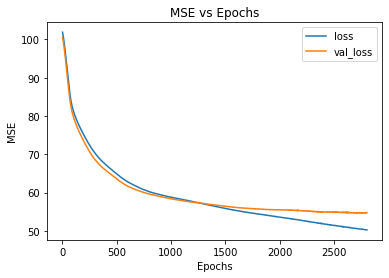

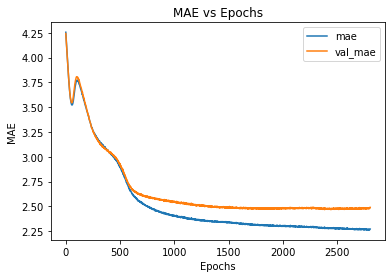

In [154]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('MSE vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

epochs = range(1, len(history.history['mae']) + 1)
plt.plot(epochs, history.history['mae'], label = 'mae')
plt.plot(epochs, history.history['val_mae'], label = 'val_mae')
plt.title('MAE vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [155]:
# evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test)
print('test_mse:', loss)
print('test_mae:', acc)

81/81 [==============================] - 0s 2ms/step - loss: 70.1597 - mae: 2.3266
test_mse: 70.15967559814453
test_mae: 2.326556921005249


### Hyperband testing

In [161]:
tf.random.set_seed(42)

def build_model(hp):
    # build the model
    model = models.Sequential()
    Flatten(input_shape=(X.shape[1:],))
    for i in range(hp.Int("num_layers", 1, 3)):
      model.add(Dense(units=hp.Int("units_" + str(i), min_value=5, max_value=20, step=5), 
                      activation='relu',
                      kernel_initializer='he_normal'))
      model.add(Dropout(hp.Float("dropout_" + str(i), 0, 0.5, step=0.1)))
    model.add(Dense(1,activation='relu'))
    # compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=hp.Choice(
            "lr", values=[0.001,0.0001])),
                  loss='mse',
                  metrics=['mae'])

    return model

In [162]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model, # A HyperModel - takes a hyperparameter and return model instance
                     objective="val_loss", # metrics to be optimized 
                     max_epochs=20, # the maximum number of epochs to train one model
                     factor=3, # the reduction factor for the number of epoch
                     hyperband_iterations=5,  # the number of times to iterate over the full Hyperband algorithm
                     directory="kt_dir", # saves logs and checkpoints for each trial run during the hyperparameter search 
                     project_name="kt_hyperband", # differentiate with other runs and is a subdirectory under directory
                     seed = 42) 

# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 20, 'step': 5, 'sampling': None}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
lr (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [163]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
tuner.search(X,y, epochs=10000, validation_split=0.3, batch_size=512, callbacks=[stop_early], verbose=2)

Trial 150 Complete [00h 00m 04s]
val_loss: 91.16362762451172

Best val_loss So Far: 70.46321105957031
Total elapsed time: 00h 06m 37s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


#### Check and fit best model

In [165]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

print(best_hps.get('num_layers')) 
# print(best_hps.get('activation'))
print(best_hps.get('lr'))
print(best_hps.get('units_0')) 
print(best_hps.get('dropout_0'))
print(best_hps.get('units_1')) 
print(best_hps.get('dropout_1'))
print(best_hps.get('units_2')) 
print(best_hps.get('dropout_2'))

3
0.001
15
0.0
20
0.4
5
0.2


In [166]:
# Fit model
model = tuner.hypermodel.build(best_hps)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
history = model.fit(X, y, epochs=10000, validation_split=0.3, batch_size=512, callbacks=[stop_early], verbose=2)
model.summary()

Epoch 1/10000
14/14 - 1s - loss: 100.0475 - mae: 4.1850 - val_loss: 99.4923 - val_mae: 4.1804 - 1s/epoch - 82ms/step
Epoch 2/10000
14/14 - 0s - loss: 97.6903 - mae: 3.9993 - val_loss: 96.0284 - val_mae: 3.8667 - 108ms/epoch - 8ms/step
Epoch 3/10000
14/14 - 0s - loss: 94.4656 - mae: 3.8215 - val_loss: 91.3855 - val_mae: 3.5462 - 101ms/epoch - 7ms/step
Epoch 4/10000
14/14 - 0s - loss: 91.3962 - mae: 3.7025 - val_loss: 87.2915 - val_mae: 3.3756 - 106ms/epoch - 8ms/step
Epoch 5/10000
14/14 - 0s - loss: 88.6421 - mae: 3.7167 - val_loss: 83.9648 - val_mae: 3.3288 - 118ms/epoch - 8ms/step
Epoch 6/10000
14/14 - 0s - loss: 87.5612 - mae: 3.7592 - val_loss: 81.7614 - val_mae: 3.2930 - 97ms/epoch - 7ms/step
Epoch 7/10000
14/14 - 0s - loss: 85.8536 - mae: 3.7347 - val_loss: 80.3062 - val_mae: 3.2440 - 96ms/epoch - 7ms/step
Epoch 8/10000
14/14 - 0s - loss: 84.6838 - mae: 3.7080 - val_loss: 79.2674 - val_mae: 3.1833 - 56ms/epoch - 4ms/step
Epoch 9/10000
14/14 - 0s - loss: 83.6666 - mae: 3.6412 - val

Epoch 71/10000
14/14 - 0s - loss: 65.3797 - mae: 2.8202 - val_loss: 60.4442 - val_mae: 2.5223 - 108ms/epoch - 8ms/step
Epoch 72/10000
14/14 - 0s - loss: 66.1693 - mae: 2.8251 - val_loss: 60.2112 - val_mae: 2.5166 - 110ms/epoch - 8ms/step
Epoch 73/10000
14/14 - 0s - loss: 66.0215 - mae: 2.7739 - val_loss: 60.3439 - val_mae: 2.5063 - 106ms/epoch - 8ms/step
Epoch 74/10000
14/14 - 0s - loss: 65.4854 - mae: 2.8298 - val_loss: 60.0296 - val_mae: 2.5060 - 106ms/epoch - 8ms/step
Epoch 75/10000
14/14 - 0s - loss: 66.0762 - mae: 2.8396 - val_loss: 59.8770 - val_mae: 2.5210 - 100ms/epoch - 7ms/step
Epoch 76/10000
14/14 - 0s - loss: 64.9035 - mae: 2.8149 - val_loss: 59.8126 - val_mae: 2.5052 - 112ms/epoch - 8ms/step
Epoch 77/10000
14/14 - 0s - loss: 67.3979 - mae: 2.7996 - val_loss: 60.4260 - val_mae: 2.4899 - 103ms/epoch - 7ms/step
Epoch 78/10000
14/14 - 0s - loss: 66.5192 - mae: 2.7960 - val_loss: 59.3796 - val_mae: 2.5078 - 101ms/epoch - 7ms/step
Epoch 79/10000
14/14 - 0s - loss: 67.9224 - mae:

Epoch 140/10000
14/14 - 0s - loss: 58.2784 - mae: 2.5870 - val_loss: 55.4492 - val_mae: 2.3497 - 116ms/epoch - 8ms/step
Epoch 141/10000
14/14 - 0s - loss: 60.4914 - mae: 2.5886 - val_loss: 55.3951 - val_mae: 2.3453 - 128ms/epoch - 9ms/step
Epoch 142/10000
14/14 - 0s - loss: 61.4867 - mae: 2.5759 - val_loss: 55.7125 - val_mae: 2.3335 - 87ms/epoch - 6ms/step
Epoch 143/10000
14/14 - 0s - loss: 61.8080 - mae: 2.5783 - val_loss: 55.3723 - val_mae: 2.3226 - 62ms/epoch - 4ms/step
Epoch 144/10000
14/14 - 0s - loss: 61.6324 - mae: 2.5500 - val_loss: 55.3089 - val_mae: 2.3219 - 56ms/epoch - 4ms/step
Epoch 145/10000
14/14 - 0s - loss: 62.0087 - mae: 2.5606 - val_loss: 55.5562 - val_mae: 2.3184 - 51ms/epoch - 4ms/step
Epoch 146/10000
14/14 - 0s - loss: 61.6041 - mae: 2.5885 - val_loss: 55.0982 - val_mae: 2.3266 - 58ms/epoch - 4ms/step
Epoch 147/10000
14/14 - 0s - loss: 59.9099 - mae: 2.5477 - val_loss: 55.2293 - val_mae: 2.3195 - 62ms/epoch - 4ms/step
Epoch 148/10000
14/14 - 0s - loss: 59.0365 - m

Epoch 209/10000
14/14 - 0s - loss: 56.5683 - mae: 2.5091 - val_loss: 51.5929 - val_mae: 2.2903 - 116ms/epoch - 8ms/step
Epoch 210/10000
14/14 - 0s - loss: 56.9285 - mae: 2.5075 - val_loss: 51.2667 - val_mae: 2.2782 - 131ms/epoch - 9ms/step
Epoch 211/10000
14/14 - 0s - loss: 57.4533 - mae: 2.5003 - val_loss: 51.0472 - val_mae: 2.2812 - 129ms/epoch - 9ms/step
Epoch 212/10000
14/14 - 0s - loss: 58.2179 - mae: 2.5320 - val_loss: 51.2039 - val_mae: 2.2832 - 114ms/epoch - 8ms/step
Epoch 213/10000
14/14 - 0s - loss: 57.4494 - mae: 2.5038 - val_loss: 51.7256 - val_mae: 2.2856 - 107ms/epoch - 8ms/step
Epoch 214/10000
14/14 - 0s - loss: 54.5814 - mae: 2.4613 - val_loss: 51.3404 - val_mae: 2.2804 - 115ms/epoch - 8ms/step
Epoch 215/10000
14/14 - 0s - loss: 54.8643 - mae: 2.4953 - val_loss: 51.1540 - val_mae: 2.2605 - 107ms/epoch - 8ms/step
Epoch 216/10000
14/14 - 0s - loss: 56.9108 - mae: 2.4648 - val_loss: 50.8302 - val_mae: 2.2342 - 111ms/epoch - 8ms/step
Epoch 217/10000
14/14 - 0s - loss: 56.79

Epoch 278/10000
14/14 - 0s - loss: 55.2815 - mae: 2.4302 - val_loss: 47.3774 - val_mae: 2.1447 - 107ms/epoch - 8ms/step
Epoch 279/10000
14/14 - 0s - loss: 53.5551 - mae: 2.3310 - val_loss: 47.3703 - val_mae: 2.1412 - 107ms/epoch - 8ms/step
Epoch 280/10000
14/14 - 0s - loss: 54.5909 - mae: 2.4285 - val_loss: 47.3496 - val_mae: 2.1566 - 106ms/epoch - 8ms/step
Epoch 281/10000
14/14 - 0s - loss: 52.1701 - mae: 2.3915 - val_loss: 47.4944 - val_mae: 2.1497 - 101ms/epoch - 7ms/step
Epoch 282/10000
14/14 - 0s - loss: 50.3199 - mae: 2.3420 - val_loss: 46.8004 - val_mae: 2.1547 - 110ms/epoch - 8ms/step
Epoch 283/10000
14/14 - 0s - loss: 54.1951 - mae: 2.4060 - val_loss: 47.5325 - val_mae: 2.1494 - 114ms/epoch - 8ms/step
Epoch 284/10000
14/14 - 0s - loss: 52.0385 - mae: 2.3796 - val_loss: 46.9506 - val_mae: 2.1520 - 126ms/epoch - 9ms/step
Epoch 285/10000
14/14 - 0s - loss: 48.9915 - mae: 2.3683 - val_loss: 47.0352 - val_mae: 2.1466 - 113ms/epoch - 8ms/step
Epoch 286/10000
14/14 - 0s - loss: 54.77

Epoch 347/10000
14/14 - 0s - loss: 50.5887 - mae: 2.3250 - val_loss: 42.7596 - val_mae: 2.0624 - 73ms/epoch - 5ms/step
Epoch 348/10000
14/14 - 0s - loss: 46.7734 - mae: 2.3209 - val_loss: 43.1466 - val_mae: 2.0869 - 62ms/epoch - 4ms/step
Epoch 349/10000
14/14 - 0s - loss: 41.4841 - mae: 2.3103 - val_loss: 42.3133 - val_mae: 2.0773 - 61ms/epoch - 4ms/step
Epoch 350/10000
14/14 - 0s - loss: 50.2282 - mae: 2.3300 - val_loss: 43.0023 - val_mae: 2.0479 - 63ms/epoch - 4ms/step
Epoch 351/10000
14/14 - 0s - loss: 43.1496 - mae: 2.2446 - val_loss: 42.5132 - val_mae: 2.0508 - 68ms/epoch - 5ms/step
Epoch 352/10000
14/14 - 0s - loss: 45.1177 - mae: 2.2784 - val_loss: 42.6692 - val_mae: 2.0720 - 60ms/epoch - 4ms/step
Epoch 353/10000
14/14 - 0s - loss: 46.4663 - mae: 2.3226 - val_loss: 42.4607 - val_mae: 2.0682 - 59ms/epoch - 4ms/step
Epoch 354/10000
14/14 - 0s - loss: 44.9333 - mae: 2.3244 - val_loss: 42.7795 - val_mae: 2.0482 - 71ms/epoch - 5ms/step
Epoch 355/10000
14/14 - 0s - loss: 48.5261 - mae

Epoch 416/10000
14/14 - 0s - loss: 45.3486 - mae: 2.3405 - val_loss: 39.8955 - val_mae: 2.0513 - 42ms/epoch - 3ms/step
Epoch 417/10000
14/14 - 0s - loss: 40.1436 - mae: 2.2842 - val_loss: 39.7898 - val_mae: 2.0363 - 38ms/epoch - 3ms/step
Epoch 418/10000
14/14 - 0s - loss: 41.2325 - mae: 2.2481 - val_loss: 39.8589 - val_mae: 2.0393 - 38ms/epoch - 3ms/step
Epoch 419/10000
14/14 - 0s - loss: 41.2172 - mae: 2.2955 - val_loss: 39.6882 - val_mae: 2.0413 - 38ms/epoch - 3ms/step
Epoch 420/10000
14/14 - 0s - loss: 43.6094 - mae: 2.2797 - val_loss: 39.9262 - val_mae: 2.0344 - 42ms/epoch - 3ms/step
Epoch 421/10000
14/14 - 0s - loss: 41.8488 - mae: 2.2737 - val_loss: 40.0455 - val_mae: 2.0393 - 51ms/epoch - 4ms/step
Epoch 422/10000
14/14 - 0s - loss: 45.9420 - mae: 2.3135 - val_loss: 40.1676 - val_mae: 2.0474 - 49ms/epoch - 4ms/step
Epoch 423/10000
14/14 - 0s - loss: 38.7976 - mae: 2.2533 - val_loss: 39.3779 - val_mae: 2.0259 - 48ms/epoch - 3ms/step
Epoch 424/10000
14/14 - 0s - loss: 41.0289 - mae

Epoch 485/10000
14/14 - 0s - loss: 41.1649 - mae: 2.2522 - val_loss: 38.3698 - val_mae: 1.9789 - 37ms/epoch - 3ms/step
Epoch 486/10000
14/14 - 0s - loss: 38.4870 - mae: 2.2619 - val_loss: 37.8728 - val_mae: 1.9901 - 39ms/epoch - 3ms/step
Epoch 487/10000
14/14 - 0s - loss: 35.0706 - mae: 2.2254 - val_loss: 37.8646 - val_mae: 1.9891 - 38ms/epoch - 3ms/step
Epoch 488/10000
14/14 - 0s - loss: 43.1523 - mae: 2.2555 - val_loss: 38.0966 - val_mae: 1.9819 - 36ms/epoch - 3ms/step
Epoch 489/10000
14/14 - 0s - loss: 40.6576 - mae: 2.2401 - val_loss: 37.2395 - val_mae: 1.9897 - 38ms/epoch - 3ms/step
Epoch 490/10000
14/14 - 0s - loss: 39.2579 - mae: 2.2764 - val_loss: 37.9345 - val_mae: 1.9719 - 39ms/epoch - 3ms/step
Epoch 491/10000
14/14 - 0s - loss: 33.7386 - mae: 2.1631 - val_loss: 37.4835 - val_mae: 1.9826 - 41ms/epoch - 3ms/step
Epoch 492/10000
14/14 - 0s - loss: 40.4230 - mae: 2.2447 - val_loss: 37.8742 - val_mae: 1.9710 - 39ms/epoch - 3ms/step
Epoch 493/10000
14/14 - 0s - loss: 42.1188 - mae

Epoch 554/10000
14/14 - 0s - loss: 35.4493 - mae: 2.1909 - val_loss: 38.6138 - val_mae: 1.9628 - 47ms/epoch - 3ms/step
Epoch 555/10000
14/14 - 0s - loss: 34.4811 - mae: 2.2056 - val_loss: 37.2617 - val_mae: 2.0029 - 39ms/epoch - 3ms/step
Epoch 556/10000
14/14 - 0s - loss: 32.9920 - mae: 2.1944 - val_loss: 37.0595 - val_mae: 1.9741 - 49ms/epoch - 4ms/step
Epoch 557/10000
14/14 - 0s - loss: 43.4991 - mae: 2.2347 - val_loss: 37.0699 - val_mae: 1.9898 - 37ms/epoch - 3ms/step
Epoch 558/10000
14/14 - 0s - loss: 38.8783 - mae: 2.2172 - val_loss: 37.4862 - val_mae: 1.9713 - 39ms/epoch - 3ms/step
Epoch 559/10000
14/14 - 0s - loss: 36.4875 - mae: 2.2348 - val_loss: 37.3975 - val_mae: 1.9732 - 41ms/epoch - 3ms/step
Epoch 560/10000
14/14 - 0s - loss: 37.2235 - mae: 2.2061 - val_loss: 37.3452 - val_mae: 1.9645 - 42ms/epoch - 3ms/step
Epoch 561/10000
14/14 - 0s - loss: 35.0437 - mae: 2.1874 - val_loss: 37.0851 - val_mae: 1.9560 - 37ms/epoch - 3ms/step
Epoch 562/10000
14/14 - 0s - loss: 38.5379 - mae

Epoch 623/10000
14/14 - 0s - loss: 31.9736 - mae: 2.1944 - val_loss: 35.0612 - val_mae: 1.9133 - 70ms/epoch - 5ms/step
Epoch 624/10000
14/14 - 0s - loss: 36.5642 - mae: 2.1873 - val_loss: 36.5626 - val_mae: 1.9616 - 64ms/epoch - 5ms/step
Epoch 625/10000
14/14 - 0s - loss: 41.5770 - mae: 2.2070 - val_loss: 35.8182 - val_mae: 1.9257 - 63ms/epoch - 4ms/step
Epoch 626/10000
14/14 - 0s - loss: 35.6026 - mae: 2.1510 - val_loss: 35.1021 - val_mae: 1.9331 - 60ms/epoch - 4ms/step
Epoch 627/10000
14/14 - 0s - loss: 37.7090 - mae: 2.2151 - val_loss: 36.3334 - val_mae: 1.9382 - 65ms/epoch - 5ms/step
Epoch 628/10000
14/14 - 0s - loss: 36.1732 - mae: 2.1924 - val_loss: 35.1063 - val_mae: 1.9307 - 68ms/epoch - 5ms/step
Epoch 629/10000
14/14 - 0s - loss: 33.5263 - mae: 2.1589 - val_loss: 36.0010 - val_mae: 1.9555 - 64ms/epoch - 5ms/step
Epoch 630/10000
14/14 - 0s - loss: 36.2314 - mae: 2.2257 - val_loss: 35.3692 - val_mae: 1.9320 - 68ms/epoch - 5ms/step
Epoch 631/10000
14/14 - 0s - loss: 33.1296 - mae

Epoch 692/10000
14/14 - 0s - loss: 35.2920 - mae: 2.1319 - val_loss: 34.3766 - val_mae: 1.9066 - 48ms/epoch - 3ms/step
Epoch 693/10000
14/14 - 0s - loss: 30.6628 - mae: 2.1380 - val_loss: 33.5581 - val_mae: 1.9137 - 45ms/epoch - 3ms/step
Epoch 694/10000
14/14 - 0s - loss: 31.5259 - mae: 2.1163 - val_loss: 34.5637 - val_mae: 1.9063 - 47ms/epoch - 3ms/step
Epoch 695/10000
14/14 - 0s - loss: 41.3320 - mae: 2.1444 - val_loss: 34.3490 - val_mae: 1.9136 - 43ms/epoch - 3ms/step
Epoch 696/10000
14/14 - 0s - loss: 34.1302 - mae: 2.1955 - val_loss: 34.2738 - val_mae: 1.9119 - 43ms/epoch - 3ms/step
Epoch 697/10000
14/14 - 0s - loss: 28.8789 - mae: 2.1381 - val_loss: 34.9232 - val_mae: 1.9224 - 45ms/epoch - 3ms/step
Epoch 698/10000
14/14 - 0s - loss: 34.9911 - mae: 2.1808 - val_loss: 34.0149 - val_mae: 1.9268 - 46ms/epoch - 3ms/step
Epoch 699/10000
14/14 - 0s - loss: 34.2257 - mae: 2.1844 - val_loss: 35.3365 - val_mae: 1.9103 - 45ms/epoch - 3ms/step
Epoch 700/10000
14/14 - 0s - loss: 35.7524 - mae

Epoch 761/10000
14/14 - 0s - loss: 30.8489 - mae: 2.1377 - val_loss: 33.0821 - val_mae: 1.9055 - 42ms/epoch - 3ms/step
Epoch 762/10000
14/14 - 0s - loss: 29.9997 - mae: 2.0979 - val_loss: 33.2570 - val_mae: 1.9100 - 49ms/epoch - 4ms/step
Epoch 763/10000
14/14 - 0s - loss: 23.9612 - mae: 2.0876 - val_loss: 33.1396 - val_mae: 1.9057 - 42ms/epoch - 3ms/step
Epoch 764/10000
14/14 - 0s - loss: 31.4721 - mae: 2.1541 - val_loss: 33.0504 - val_mae: 1.9202 - 44ms/epoch - 3ms/step
Epoch 765/10000
14/14 - 0s - loss: 34.0711 - mae: 2.1366 - val_loss: 33.6855 - val_mae: 1.9098 - 45ms/epoch - 3ms/step
Epoch 766/10000
14/14 - 0s - loss: 29.9615 - mae: 2.1094 - val_loss: 33.2734 - val_mae: 1.9302 - 47ms/epoch - 3ms/step
Epoch 767/10000
14/14 - 0s - loss: 35.0421 - mae: 2.1761 - val_loss: 33.2853 - val_mae: 1.9299 - 46ms/epoch - 3ms/step
Epoch 768/10000
14/14 - 0s - loss: 29.2148 - mae: 2.1122 - val_loss: 33.4760 - val_mae: 1.9225 - 48ms/epoch - 3ms/step
Epoch 769/10000
14/14 - 0s - loss: 32.6666 - mae

Epoch 830/10000
14/14 - 0s - loss: 26.4755 - mae: 2.0342 - val_loss: 31.8296 - val_mae: 1.8163 - 43ms/epoch - 3ms/step
Epoch 831/10000
14/14 - 0s - loss: 36.1870 - mae: 2.1246 - val_loss: 31.9791 - val_mae: 1.8205 - 48ms/epoch - 3ms/step
Epoch 832/10000
14/14 - 0s - loss: 32.4622 - mae: 2.0521 - val_loss: 32.2083 - val_mae: 1.8158 - 45ms/epoch - 3ms/step
Epoch 833/10000
14/14 - 0s - loss: 30.5436 - mae: 2.0265 - val_loss: 34.5166 - val_mae: 1.8181 - 48ms/epoch - 3ms/step
Epoch 834/10000
14/14 - 0s - loss: 33.3339 - mae: 2.0856 - val_loss: 33.1049 - val_mae: 1.8257 - 44ms/epoch - 3ms/step
Epoch 835/10000
14/14 - 0s - loss: 28.2095 - mae: 2.0563 - val_loss: 32.3166 - val_mae: 1.8144 - 42ms/epoch - 3ms/step
Epoch 836/10000
14/14 - 0s - loss: 30.7958 - mae: 2.0033 - val_loss: 34.8652 - val_mae: 1.8230 - 45ms/epoch - 3ms/step
Epoch 837/10000
14/14 - 0s - loss: 32.8824 - mae: 2.0864 - val_loss: 31.7571 - val_mae: 1.8337 - 44ms/epoch - 3ms/step
Epoch 838/10000
14/14 - 0s - loss: 40.9146 - mae

Epoch 899/10000
14/14 - 0s - loss: 34.2823 - mae: 2.0631 - val_loss: 31.5735 - val_mae: 1.7387 - 56ms/epoch - 4ms/step
Epoch 900/10000
14/14 - 0s - loss: 32.2610 - mae: 2.0058 - val_loss: 31.1206 - val_mae: 1.7331 - 60ms/epoch - 4ms/step
Epoch 901/10000
14/14 - 0s - loss: 26.1307 - mae: 1.9952 - val_loss: 30.8638 - val_mae: 1.7293 - 63ms/epoch - 4ms/step
Epoch 902/10000
14/14 - 0s - loss: 25.8934 - mae: 1.9882 - val_loss: 32.7566 - val_mae: 1.7735 - 60ms/epoch - 4ms/step
Epoch 903/10000
14/14 - 0s - loss: 30.4621 - mae: 2.0182 - val_loss: 30.8739 - val_mae: 1.7153 - 77ms/epoch - 5ms/step
Epoch 904/10000
14/14 - 0s - loss: 23.8654 - mae: 1.9727 - val_loss: 31.2659 - val_mae: 1.7206 - 75ms/epoch - 5ms/step
Epoch 905/10000
14/14 - 0s - loss: 26.8875 - mae: 2.0022 - val_loss: 31.9485 - val_mae: 1.7593 - 74ms/epoch - 5ms/step
Epoch 906/10000
14/14 - 0s - loss: 32.5092 - mae: 2.0143 - val_loss: 32.8178 - val_mae: 1.7397 - 68ms/epoch - 5ms/step
Epoch 907/10000
14/14 - 0s - loss: 30.5750 - mae

Epoch 968/10000
14/14 - 0s - loss: 29.8018 - mae: 2.0050 - val_loss: 31.4238 - val_mae: 1.7146 - 76ms/epoch - 5ms/step
Epoch 969/10000
14/14 - 0s - loss: 30.2136 - mae: 2.0406 - val_loss: 32.4501 - val_mae: 1.7344 - 72ms/epoch - 5ms/step
Epoch 970/10000
14/14 - 0s - loss: 27.9579 - mae: 2.0046 - val_loss: 30.4861 - val_mae: 1.7349 - 83ms/epoch - 6ms/step
Epoch 971/10000
14/14 - 0s - loss: 27.0654 - mae: 1.9869 - val_loss: 31.0394 - val_mae: 1.7138 - 76ms/epoch - 5ms/step
Epoch 972/10000
14/14 - 0s - loss: 26.5020 - mae: 1.9851 - val_loss: 31.4826 - val_mae: 1.7074 - 64ms/epoch - 5ms/step
Epoch 973/10000
14/14 - 0s - loss: 29.2253 - mae: 2.0221 - val_loss: 32.6231 - val_mae: 1.7136 - 70ms/epoch - 5ms/step
Epoch 974/10000
14/14 - 0s - loss: 31.2095 - mae: 1.9950 - val_loss: 33.8344 - val_mae: 1.7597 - 67ms/epoch - 5ms/step
Epoch 975/10000
14/14 - 0s - loss: 35.3921 - mae: 2.0686 - val_loss: 33.3109 - val_mae: 1.7377 - 68ms/epoch - 5ms/step
Epoch 976/10000
14/14 - 0s - loss: 30.4074 - mae

Epoch 1037/10000
14/14 - 0s - loss: 19.8209 - mae: 1.9477 - val_loss: 31.4380 - val_mae: 1.7322 - 48ms/epoch - 3ms/step
Epoch 1038/10000
14/14 - 0s - loss: 30.7944 - mae: 2.0415 - val_loss: 31.9876 - val_mae: 1.7195 - 50ms/epoch - 4ms/step
Epoch 1039/10000
14/14 - 0s - loss: 21.4549 - mae: 1.9558 - val_loss: 32.4077 - val_mae: 1.7267 - 51ms/epoch - 4ms/step
Epoch 1040/10000
14/14 - 0s - loss: 31.9181 - mae: 2.0197 - val_loss: 30.9585 - val_mae: 1.7202 - 54ms/epoch - 4ms/step
Epoch 1041/10000
14/14 - 0s - loss: 24.7147 - mae: 1.9480 - val_loss: 30.0387 - val_mae: 1.7212 - 50ms/epoch - 4ms/step
Epoch 1042/10000
14/14 - 0s - loss: 32.8578 - mae: 1.9873 - val_loss: 33.1085 - val_mae: 1.7336 - 48ms/epoch - 3ms/step
Epoch 1043/10000
14/14 - 0s - loss: 30.8301 - mae: 1.9872 - val_loss: 32.0051 - val_mae: 1.7294 - 47ms/epoch - 3ms/step
Epoch 1044/10000
14/14 - 0s - loss: 30.1418 - mae: 1.9304 - val_loss: 31.1934 - val_mae: 1.7145 - 47ms/epoch - 3ms/step
Epoch 1045/10000
14/14 - 0s - loss: 29.4

Epoch 1106/10000
14/14 - 0s - loss: 30.4152 - mae: 2.0281 - val_loss: 31.7244 - val_mae: 1.7273 - 47ms/epoch - 3ms/step
Epoch 1107/10000
14/14 - 0s - loss: 29.1368 - mae: 1.9760 - val_loss: 32.3628 - val_mae: 1.7236 - 44ms/epoch - 3ms/step
Epoch 1108/10000
14/14 - 0s - loss: 25.8751 - mae: 1.9794 - val_loss: 31.5238 - val_mae: 1.7589 - 44ms/epoch - 3ms/step
Epoch 1109/10000
14/14 - 0s - loss: 27.8458 - mae: 1.9730 - val_loss: 30.9580 - val_mae: 1.7056 - 46ms/epoch - 3ms/step
Epoch 1110/10000
14/14 - 0s - loss: 31.3092 - mae: 2.0048 - val_loss: 31.6061 - val_mae: 1.7074 - 45ms/epoch - 3ms/step
Epoch 1111/10000
14/14 - 0s - loss: 23.5679 - mae: 1.9511 - val_loss: 31.5434 - val_mae: 1.7088 - 44ms/epoch - 3ms/step
Epoch 1112/10000
14/14 - 0s - loss: 31.2649 - mae: 1.9920 - val_loss: 31.9676 - val_mae: 1.6987 - 43ms/epoch - 3ms/step
Epoch 1113/10000
14/14 - 0s - loss: 26.5858 - mae: 2.0025 - val_loss: 31.3537 - val_mae: 1.7006 - 44ms/epoch - 3ms/step
Epoch 1114/10000
14/14 - 0s - loss: 29.9

Epoch 1175/10000
14/14 - 0s - loss: 19.0437 - mae: 1.9299 - val_loss: 30.9401 - val_mae: 1.6969 - 47ms/epoch - 3ms/step
Epoch 1176/10000
14/14 - 0s - loss: 22.7304 - mae: 1.9226 - val_loss: 31.6454 - val_mae: 1.6945 - 44ms/epoch - 3ms/step
Epoch 1177/10000
14/14 - 0s - loss: 24.6679 - mae: 1.9499 - val_loss: 31.4202 - val_mae: 1.7205 - 46ms/epoch - 3ms/step
Epoch 1178/10000
14/14 - 0s - loss: 35.1452 - mae: 2.0406 - val_loss: 31.2160 - val_mae: 1.7065 - 50ms/epoch - 4ms/step
Epoch 1179/10000
14/14 - 0s - loss: 26.6265 - mae: 2.0283 - val_loss: 34.9221 - val_mae: 1.7350 - 55ms/epoch - 4ms/step
Epoch 1180/10000
14/14 - 0s - loss: 23.5167 - mae: 1.9401 - val_loss: 30.4903 - val_mae: 1.6858 - 48ms/epoch - 3ms/step
Epoch 1181/10000
14/14 - 0s - loss: 32.7023 - mae: 2.0365 - val_loss: 30.4299 - val_mae: 1.6850 - 47ms/epoch - 3ms/step
Epoch 1182/10000
14/14 - 0s - loss: 23.4984 - mae: 1.9408 - val_loss: 31.2847 - val_mae: 1.6856 - 45ms/epoch - 3ms/step
Epoch 1183/10000
14/14 - 0s - loss: 24.9

In [167]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [74]:
model = models.load_model('my_model')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,361
Trainable params: 33,361
Non-trainable params: 0
_________________________________________________________________


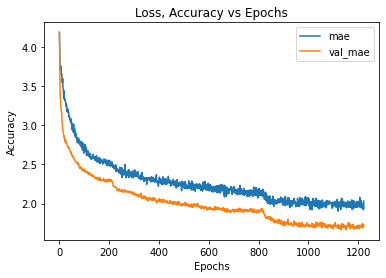

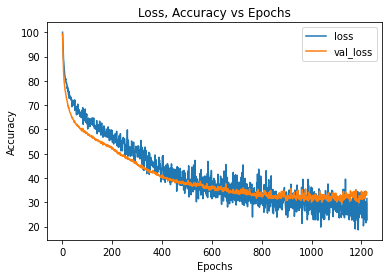

In [168]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['mae']) + 1)
plt.plot(epochs, history.history['mae'], label = 'mae')
plt.plot(epochs, history.history['val_mae'], label = 'val_mae')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [169]:
# evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test)
print('test_loss:', loss)
print('test_acc:', acc)

81/81 [==============================] - 0s 598us/step - loss: 57.6513 - mae: 1.7633
test_loss: 57.65128707885742
test_acc: 1.7633259296417236


## Model Evaluation

In [176]:
tf.random.set_seed(42)

k = 4 # set the fold 
num_val_samples = len(X) // k
num_epochs = 200
batchsize = 512

all_train_scores = [] # optional
all_val_scores = []

all_loss_histories = []
all_val_loss_histories = []
all_mae_histories = []
all_val_mae_histories = []

for i in range(k):
  print('processing fold #', i+1)
  Xval = X[i * num_val_samples: (i + 1) * num_val_samples]
  yval = y[i * num_val_samples: (i + 1) * num_val_samples]
  
  #Prepares the training data: data from all other partitions
  partial_X = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
  partial_y = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
  
  # build the compiled model
  #model = build_model()
  # train the model 
  history = model.fit(partial_X, partial_y, validation_data = (Xval,yval), epochs=num_epochs, batch_size=batchsize)
  
  # evaluates the model on the validation set
  loss_history = history.history['loss']
  all_loss_histories.append(loss_history)
  val_loss_history = history.history['val_loss']
  all_val_loss_histories.append(val_loss_history)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)
  val_mae_history = history.history['val_mae']
  all_val_mae_histories.append(val_mae_history)

  val_loss, val_mae = model.evaluate(Xval, yval)
  all_val_scores.append(val_mae)

  loss, mae = model.evaluate(partial_X, partial_y) # optional
  all_train_scores.append(mae) # optional

processing fold # 1
Epoch 1/200
15/15 [==============================] - 0s 5ms/step - loss: 19.9516 - mae: 1.7970 - val_loss: 13.3565 - val_mae: 1.2635
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 20.7322 - mae: 1.7946 - val_loss: 12.6026 - val_mae: 1.2258
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 16.3900 - mae: 1.7580 - val_loss: 13.9105 - val_mae: 1.2284
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 15.2811 - mae: 1.7499 - val_loss: 17.0290 - val_mae: 1.2403
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 18.7215 - mae: 1.7718 - val_loss: 15.3032 - val_mae: 1.2519
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 20.7648 - mae: 1.7978 - val_loss: 18.4284 - val_mae: 1.2526
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 20.5319 - mae: 1.7865 - val_loss: 40.6592 - val_mae: 1.3897
Epoch 8/200
15/15 [==============================

15/15 [==============================] - 0s 5ms/step - loss: 16.0390 - mae: 1.7418 - val_loss: 29.7661 - val_mae: 1.3401
Epoch 63/200
15/15 [==============================] - 0s 4ms/step - loss: 27.5883 - mae: 1.8204 - val_loss: 30.9100 - val_mae: 1.3351
Epoch 64/200
15/15 [==============================] - 0s 4ms/step - loss: 16.1532 - mae: 1.7288 - val_loss: 33.6818 - val_mae: 1.3579
Epoch 65/200
15/15 [==============================] - 0s 4ms/step - loss: 17.3620 - mae: 1.7676 - val_loss: 30.4987 - val_mae: 1.3433
Epoch 66/200
15/15 [==============================] - 0s 4ms/step - loss: 18.4619 - mae: 1.7684 - val_loss: 32.2693 - val_mae: 1.3327
Epoch 67/200
15/15 [==============================] - 0s 4ms/step - loss: 16.4594 - mae: 1.7459 - val_loss: 37.8682 - val_mae: 1.4107
Epoch 68/200
15/15 [==============================] - 0s 4ms/step - loss: 19.5117 - mae: 1.7537 - val_loss: 33.8272 - val_mae: 1.3615
Epoch 69/200
15/15 [==============================] - 0s 4ms/step - loss: 1

15/15 [==============================] - 0s 5ms/step - loss: 15.0060 - mae: 1.7385 - val_loss: 34.3323 - val_mae: 1.4023
Epoch 124/200
15/15 [==============================] - 0s 4ms/step - loss: 17.9931 - mae: 1.7469 - val_loss: 33.5659 - val_mae: 1.3615
Epoch 125/200
15/15 [==============================] - 0s 4ms/step - loss: 18.4248 - mae: 1.7277 - val_loss: 34.1846 - val_mae: 1.3864
Epoch 126/200
15/15 [==============================] - 0s 4ms/step - loss: 16.0909 - mae: 1.7195 - val_loss: 34.4976 - val_mae: 1.3989
Epoch 127/200
15/15 [==============================] - 0s 4ms/step - loss: 16.2532 - mae: 1.7541 - val_loss: 33.6301 - val_mae: 1.3867
Epoch 128/200
15/15 [==============================] - 0s 5ms/step - loss: 20.5001 - mae: 1.7766 - val_loss: 43.3725 - val_mae: 1.4777
Epoch 129/200
15/15 [==============================] - 0s 5ms/step - loss: 23.5766 - mae: 1.7929 - val_loss: 32.7529 - val_mae: 1.3292
Epoch 130/200
15/15 [==============================] - 0s 5ms/step - 

Epoch 184/200
15/15 [==============================] - 0s 6ms/step - loss: 20.4617 - mae: 1.7343 - val_loss: 46.3547 - val_mae: 1.5171
Epoch 185/200
15/15 [==============================] - 0s 6ms/step - loss: 21.8859 - mae: 1.7745 - val_loss: 35.1411 - val_mae: 1.3501
Epoch 186/200
15/15 [==============================] - 0s 6ms/step - loss: 17.6441 - mae: 1.7767 - val_loss: 36.1660 - val_mae: 1.4337
Epoch 187/200
15/15 [==============================] - 0s 6ms/step - loss: 15.2587 - mae: 1.7381 - val_loss: 31.8398 - val_mae: 1.3625
Epoch 188/200
15/15 [==============================] - 0s 6ms/step - loss: 18.4244 - mae: 1.7633 - val_loss: 30.8882 - val_mae: 1.3659
Epoch 189/200
15/15 [==============================] - 0s 6ms/step - loss: 17.6021 - mae: 1.7190 - val_loss: 33.4679 - val_mae: 1.3781
Epoch 190/200
15/15 [==============================] - 0s 6ms/step - loss: 23.4096 - mae: 1.8422 - val_loss: 39.5895 - val_mae: 1.4254
Epoch 191/200
15/15 [==============================] - 

Epoch 44/200
15/15 [==============================] - 0s 4ms/step - loss: 21.3781 - mae: 1.7539 - val_loss: 10.6852 - val_mae: 1.2231
Epoch 45/200
15/15 [==============================] - 0s 5ms/step - loss: 20.7900 - mae: 1.7806 - val_loss: 9.4344 - val_mae: 1.2362
Epoch 46/200
15/15 [==============================] - 0s 5ms/step - loss: 19.9429 - mae: 1.7801 - val_loss: 10.3680 - val_mae: 1.2562
Epoch 47/200
15/15 [==============================] - 0s 5ms/step - loss: 18.1589 - mae: 1.7786 - val_loss: 11.9347 - val_mae: 1.2786
Epoch 48/200
15/15 [==============================] - 0s 5ms/step - loss: 25.3882 - mae: 1.7982 - val_loss: 9.6748 - val_mae: 1.2654
Epoch 49/200
15/15 [==============================] - 0s 5ms/step - loss: 22.9613 - mae: 1.7571 - val_loss: 11.5339 - val_mae: 1.2543
Epoch 50/200
15/15 [==============================] - 0s 4ms/step - loss: 24.1080 - mae: 1.7879 - val_loss: 8.8348 - val_mae: 1.2130
Epoch 51/200
15/15 [==============================] - 0s 4ms/step

Epoch 166/200
15/15 [==============================] - 0s 6ms/step - loss: 30.1653 - mae: 1.8368 - val_loss: 11.5503 - val_mae: 1.2408
Epoch 167/200
15/15 [==============================] - 0s 6ms/step - loss: 17.6829 - mae: 1.8031 - val_loss: 11.2754 - val_mae: 1.2882
Epoch 168/200
15/15 [==============================] - 0s 6ms/step - loss: 26.9309 - mae: 1.7799 - val_loss: 13.0078 - val_mae: 1.3456
Epoch 169/200
15/15 [==============================] - 0s 6ms/step - loss: 21.8553 - mae: 1.7773 - val_loss: 12.2255 - val_mae: 1.2682
Epoch 170/200
15/15 [==============================] - 0s 7ms/step - loss: 23.3563 - mae: 1.7906 - val_loss: 10.4470 - val_mae: 1.2544
Epoch 171/200
15/15 [==============================] - 0s 7ms/step - loss: 20.5252 - mae: 1.7944 - val_loss: 9.6452 - val_mae: 1.2413
Epoch 172/200
15/15 [==============================] - 0s 6ms/step - loss: 20.3857 - mae: 1.7686 - val_loss: 11.6707 - val_mae: 1.2979
Epoch 173/200
15/15 [==============================] - 0

15/15 [==============================] - 0s 4ms/step - loss: 21.2992 - mae: 1.7912 - val_loss: 25.1290 - val_mae: 1.3229
Epoch 87/200
15/15 [==============================] - 0s 4ms/step - loss: 22.7219 - mae: 1.7877 - val_loss: 24.8422 - val_mae: 1.2932
Epoch 88/200
15/15 [==============================] - 0s 4ms/step - loss: 24.9879 - mae: 1.7728 - val_loss: 25.8830 - val_mae: 1.3347
Epoch 89/200
15/15 [==============================] - 0s 4ms/step - loss: 20.9088 - mae: 1.7800 - val_loss: 24.9537 - val_mae: 1.3149
Epoch 90/200
15/15 [==============================] - 0s 4ms/step - loss: 20.4606 - mae: 1.7953 - val_loss: 24.2003 - val_mae: 1.3167
Epoch 91/200
15/15 [==============================] - 0s 4ms/step - loss: 20.1750 - mae: 1.7800 - val_loss: 24.0436 - val_mae: 1.3106
Epoch 92/200
15/15 [==============================] - 0s 4ms/step - loss: 17.2268 - mae: 1.7373 - val_loss: 23.4246 - val_mae: 1.2834
Epoch 93/200
15/15 [==============================] - 0s 4ms/step - loss: 1

Epoch 147/200
15/15 [==============================] - 0s 4ms/step - loss: 18.8055 - mae: 1.7529 - val_loss: 23.5187 - val_mae: 1.3251
Epoch 148/200
15/15 [==============================] - 0s 4ms/step - loss: 19.9154 - mae: 1.7740 - val_loss: 23.7049 - val_mae: 1.3346
Epoch 149/200
15/15 [==============================] - 0s 4ms/step - loss: 21.8773 - mae: 1.7712 - val_loss: 23.3254 - val_mae: 1.3173
Epoch 150/200
15/15 [==============================] - 0s 4ms/step - loss: 19.7004 - mae: 1.7478 - val_loss: 18.6287 - val_mae: 1.2979
Epoch 151/200
15/15 [==============================] - 0s 4ms/step - loss: 22.2859 - mae: 1.7526 - val_loss: 19.5554 - val_mae: 1.3238
Epoch 152/200
15/15 [==============================] - 0s 4ms/step - loss: 24.3327 - mae: 1.7774 - val_loss: 24.3896 - val_mae: 1.3031
Epoch 153/200
15/15 [==============================] - 0s 4ms/step - loss: 19.5235 - mae: 1.7989 - val_loss: 24.6821 - val_mae: 1.3000
Epoch 154/200
15/15 [==============================] - 

15/15 [==============================] - 0s 4ms/step - loss: 28.6434 - mae: 1.7906 - val_loss: 11.1538 - val_mae: 1.1927
Epoch 68/200
15/15 [==============================] - 0s 4ms/step - loss: 28.3405 - mae: 1.8155 - val_loss: 10.6047 - val_mae: 1.2045
Epoch 69/200
15/15 [==============================] - 0s 4ms/step - loss: 22.9729 - mae: 1.7766 - val_loss: 9.9945 - val_mae: 1.1854
Epoch 70/200
15/15 [==============================] - 0s 4ms/step - loss: 21.5729 - mae: 1.7612 - val_loss: 12.1538 - val_mae: 1.2166
Epoch 71/200
15/15 [==============================] - 0s 5ms/step - loss: 18.7201 - mae: 1.7680 - val_loss: 11.7267 - val_mae: 1.2228
Epoch 72/200
15/15 [==============================] - 0s 4ms/step - loss: 21.1491 - mae: 1.7843 - val_loss: 11.1314 - val_mae: 1.2121
Epoch 73/200
15/15 [==============================] - 0s 4ms/step - loss: 23.1645 - mae: 1.8049 - val_loss: 14.7408 - val_mae: 1.2341
Epoch 74/200
15/15 [==============================] - 0s 4ms/step - loss: 19

15/15 [==============================] - 0s 4ms/step - loss: 20.5537 - mae: 1.7784 - val_loss: 14.1778 - val_mae: 1.2457
Epoch 129/200
15/15 [==============================] - 0s 4ms/step - loss: 25.2548 - mae: 1.8252 - val_loss: 24.6182 - val_mae: 1.3193
Epoch 130/200
15/15 [==============================] - 0s 4ms/step - loss: 26.0828 - mae: 1.8323 - val_loss: 14.8205 - val_mae: 1.2280
Epoch 131/200
15/15 [==============================] - 0s 4ms/step - loss: 22.1945 - mae: 1.7930 - val_loss: 15.5151 - val_mae: 1.2449
Epoch 132/200
15/15 [==============================] - 0s 4ms/step - loss: 17.3042 - mae: 1.7644 - val_loss: 18.0806 - val_mae: 1.2672
Epoch 133/200
15/15 [==============================] - 0s 4ms/step - loss: 18.6367 - mae: 1.7483 - val_loss: 18.5746 - val_mae: 1.2581
Epoch 134/200
15/15 [==============================] - 0s 4ms/step - loss: 17.1905 - mae: 1.7809 - val_loss: 19.6337 - val_mae: 1.3144
Epoch 135/200
15/15 [==============================] - 0s 4ms/step - 

Epoch 189/200
15/15 [==============================] - 0s 6ms/step - loss: 19.8787 - mae: 1.8216 - val_loss: 18.9473 - val_mae: 1.2537
Epoch 190/200
15/15 [==============================] - 0s 5ms/step - loss: 20.1520 - mae: 1.7847 - val_loss: 16.2146 - val_mae: 1.3037
Epoch 191/200
15/15 [==============================] - 0s 5ms/step - loss: 22.5978 - mae: 1.7764 - val_loss: 17.5120 - val_mae: 1.2929
Epoch 192/200
15/15 [==============================] - 0s 6ms/step - loss: 23.1964 - mae: 1.8022 - val_loss: 19.8984 - val_mae: 1.2664
Epoch 193/200
15/15 [==============================] - 0s 6ms/step - loss: 31.0983 - mae: 1.8241 - val_loss: 17.1202 - val_mae: 1.2456
Epoch 194/200
15/15 [==============================] - 0s 5ms/step - loss: 13.8562 - mae: 1.7226 - val_loss: 16.5967 - val_mae: 1.2477
Epoch 195/200
15/15 [==============================] - 0s 6ms/step - loss: 19.1214 - mae: 1.7490 - val_loss: 25.7658 - val_mae: 1.3150
Epoch 196/200
15/15 [==============================] - 

In [177]:
print(len(all_val_scores))
print(all_val_scores)
np.mean(all_val_scores)

4
[1.352442979812622, 1.297091007232666, 1.3813107013702393, 1.2955325841903687]


1.331594318151474

In [178]:
print(len(all_train_scores))
print(all_train_scores)
np.mean(all_train_scores)

4
[1.1507538557052612, 1.1802393198013306, 1.243608832359314, 1.2878609895706177]


1.2156157493591309

In [179]:
# epochs of the first k
len(all_mae_histories[0])

200

In [180]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

[1.8004176020622253, 1.7940085530281067, 1.7978789806365967, 1.7724266648292542, 1.8147449791431427, 1.8215153813362122, 1.808998852968216, 1.7875153124332428, 1.8300208151340485, 1.7939761281013489, 1.798609584569931, 1.8133357763290405, 1.7911670804023743, 1.7927449345588684, 1.8080337643623352, 1.7635108530521393, 1.7773795425891876, 1.7941753268241882, 1.7845501601696014, 1.7956426441669464, 1.8264247179031372, 1.787832885980606, 1.7930248975753784, 1.7939562797546387, 1.8082784712314606, 1.792825162410736, 1.7597916424274445, 1.7585707008838654, 1.7919390201568604, 1.7782875001430511, 1.7724216282367706, 1.7773478329181671, 1.7730768322944641, 1.7884087562561035, 1.7719264328479767, 1.7834249436855316, 1.7496797442436218, 1.7947464287281036, 1.803058922290802, 1.7566402852535248, 1.7675015330314636, 1.7860260903835297, 1.7629335522651672, 1.7733942568302155, 1.7620586156845093, 1.7875295281410217, 1.7831543684005737, 1.780932366847992, 1.7876448035240173, 1.771241933107376, 1.8127

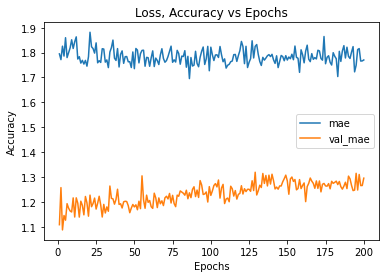

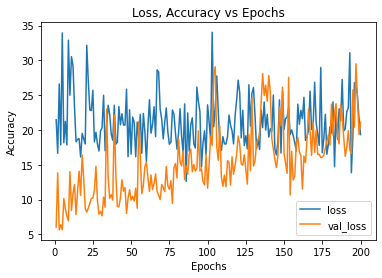

In [181]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['mae']) + 1)
plt.plot(epochs, history.history['mae'], label = 'mae')
plt.plot(epochs, history.history['val_mae'], label = 'val_mae')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [182]:
# re-build the model for 10 epochs (from the plot, val_mae stops improving significantly after 80 epochs)

tf.random.set_seed(42)

k = 4 # set the fold 
num_val_samples = len(X) // k
num_epochs = 10
batchsize = 512
all_scores = []
all_loss_histories = []
all_val_loss_histories = []
all_mae_histories = []
all_val_mae_histories = []

for i in range(k):
  print('processing fold #', i+1)
  Xval = X[i * num_val_samples: (i + 1) * num_val_samples]
  yval = y[i * num_val_samples: (i + 1) * num_val_samples]
  
  #Prepares the training data: data from all other partitions
  partial_X = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
  partial_y = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
  
  # build the compiled model
  #model = build_model()
  # train the model 
  history = model.fit(partial_X, partial_y, validation_data = (Xval,yval), epochs=num_epochs, batch_size=batchsize)
  
  # evaluates the model on the validation set
  loss_history = history.history['loss']
  all_loss_histories.append(loss_history)
  val_loss_history = history.history['val_loss']
  all_val_loss_histories.append(val_loss_history)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)
  val_mae_history = history.history['val_mae']
  all_val_mae_histories.append(val_mae_history)
  val_loss, val_mae = model.evaluate(Xval, yval)
  all_scores.append(val_mae)

processing fold # 1
Epoch 1/10
15/15 [==============================] - 0s 5ms/step - loss: 18.6544 - mae: 1.7811 - val_loss: 13.4381 - val_mae: 1.2260
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 19.1202 - mae: 1.7944 - val_loss: 9.8273 - val_mae: 1.1689
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 20.3152 - mae: 1.7817 - val_loss: 20.3458 - val_mae: 1.3444
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 18.6886 - mae: 1.7752 - val_loss: 10.9969 - val_mae: 1.1461
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 18.4859 - mae: 1.7946 - val_loss: 17.4829 - val_mae: 1.3305
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 18.2823 - mae: 1.7588 - val_loss: 15.4908 - val_mae: 1.2374
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 16.4337 - mae: 1.7436 - val_loss: 15.4764 - val_mae: 1.2091
Epoch 8/10
15/15 [==============================] - 0s 3m

In [183]:
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]
print(average_val_mae_history)

[1.1890139877796173, 1.1851624548435211, 1.223397433757782, 1.1916848123073578, 1.2546221017837524, 1.184482216835022, 1.2148524820804596, 1.2551147639751434, 1.2612929940223694, 1.2670709490776062]


In [184]:
# evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('test_loss:', loss)
print('test_mae:', mae)

81/81 [==============================] - 0s 985us/step - loss: 46.9885 - mae: 1.4521
test_loss: 46.98849105834961
test_mae: 1.4521270990371704


## Prediction

In [185]:
# make a prediction
pred = model.predict(X_test[0:1,:])
print(pred)
print("gound truth of X", y_test[0])

[[3.320593]]
gound truth of X 3.7
